<a href="https://colab.research.google.com/github/alanev52/WSD/blob/main/WSD_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculation Bias

**Sense Bias Definition**

"We propose the following procedure for computing the disambiguation bias toward a specific sense. For a word with polysemy $n$, we are interested in computing the disambiguation bias $B_{j}$ toward its $j$-th sense $s_{j}$. Let $n_{ij}$ be the total number of test instances with the gold label $s_{i}$ that were mistakenly disambiguated as $s_{j}$ ($i \neq j$). We first normalize $n_{ij}$ by the total number of (gold-labeled) instances for $s_{i}$, that is, $\sum_{j}n_{ij}$, to obtain bias $b_{ij}$, which is the bias from sense $i$ to sense $j$. In other words, $b_{ij}$ denotes the ratio of $s_{i}$-labeled instances that were misclassified as $s_{j}$. The total bias toward a specific sense $B_{j}$ is then computed as:

$$ B_{j} = \sum_{i=1,i\neq j}^{n}\frac{n_{ij}}{\sum_{j}n_{ij}} $$

The value of $B_{j}$ denotes the tendency of the disambiguation system to disambiguate a word with the intended sense of $s_{k}$, $k \neq j$, incorrectly as $s_{j}$. The higher the value of $B_{j}$, the more the disambiguation model is biased towards $s_{j}$. We finally compute the sense bias $B$ as the maximum $B_{j}$ value toward different senses of a specific word, that is, $\max(B_{j})$, $j \in [1, n]$. Given fluctuations in the results, particularly for the case of small training data, we take the median of three runs to compute $B_{j}$.

In our coarse-grained disambiguation setting, the bias $B$ can be mostly attributed to the case where the system did not have enough evidence to distinguish $s_{j}$ from other senses and had pretraining bias towards $s_{j}$. One intuitive explanation for this would be that the language model is biased toward $s_{j}$ because it has seen the target word more often with this intended sense than other $s_{k}, k \neq j$ senses"(Loureiro et al.,2021: 416).

**Reference**:


Daniel Loureiro, Kiamehr Rezaee, Moham-
mad Taher Pilehvar, and Jose Camacho-
Collados. 2021. Analysis and evaluation of lan-
guage models for word sense disambiguation.
Computational Linguistics, 47(2):387–443

# FT_predictions

In [ ]:
import os
import ast
import numpy as np
from collections import defaultdict

"""open file with predictions for FT, define most common and save as dict of np.arrays:
   {model:{word: np.array(median preds from 3 FT runs)}}"""

def common_ft_preds(path):
  all_words_preds = {}
  models = defaultdict(list)
  for folder in os.listdir(path)[:-1]:
    for file in os.listdir(os.path.join(path, folder)):
      file_path = os.path.join(path, folder, file)
      if file == 'all_results.txt':
        with open(file_path, 'r', encoding="utf-8") as predictions:
          all_preds = []
          word = None
          for line in predictions:
            if 'word' in line:
              word = line.split(',')[1]
            if "[" in line:
              pred = tuple(ast.literal_eval(line))
              all_preds.append(pred)
              if len(all_preds) == 3:
                data = np.array(all_preds)
                if word not in all_words_preds:
                  all_words_preds[word] = np.median(data, axis=0).astype(int)
                all_preds = []
    models[folder] = all_words_preds
  return(models)

path = "/content/drive/MyDrive/RD_project/results/WSD_full/ft"
ft_models = common_ft_preds(path)
for model, preds in ft_models.items():
  print(model, preds)

DeepPavlov {'dejstvie': array([3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1,
       3, 4, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3]), 'delo': array([1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2]), "den'": array([1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2,
       1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1]), 'disk': array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]), 'dokument': array([0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2]), 'dolja': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]), 'dom': array([0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0]), 'doroga': array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0]), 'duh': array([0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0]), 'mesto': array([1, 

# 1NN predictions

In [ ]:
import os
import ast
import numpy as np
import json
from collections import defaultdict, OrderedDict

"""open file with predictions for 1NN, define most common and save as dict of np.arrays:
   {model:{word: np.array(median preds from 3 FT runs)}}"""



def classes(cl_path):
  classes = {}
  for folder in sorted(os.listdir(cl_path)):
    if os.path.join(cl_path, folder, 'classes_map.txt'):
      cl_f = os.path.join(cl_path, folder, 'classes_map.txt')
      with open(cl_f, 'r', encoding="utf-8") as cl:
        for line in cl:
          cl_dict = json.loads(line)
    classes[folder] = cl_dict
  return(classes)



def fx_preds(path):

  models = defaultdict(list)
  for folder in os.listdir(path):
    if folder == 'DeepPavlov':
      for in_folder in sorted(os.listdir(os.path.join(path, folder))):
        f_path = os.path.join(path, folder, in_folder)
        data_path = os.listdir(os.path.join(path, folder, in_folder))
    else:
      f_path = os.path.join(path, folder)
      data_path = os.listdir(os.path.join(path, folder))
    all_words_preds = OrderedDict()
    for file in data_path:
      #print(file)
      if file.endswith('.jsonl'):
        jsonl_file = os.path.join(f_path, file)
        #print(folder, file)
        data = [json.loads(line) for line in open(jsonl_file, 'r')]
        #print(len(data))
        test = []
        for i in data:
          pred = i['matches'][0][0]
          word = i['gold'].split('_')[0]
          #print(folder, pred, word)
          for k,v in classes[word].items():
            if pred == v:
              test.append(int(k))
        # if word == "dokument":
        #   print(word, test)
        if word not in all_words_preds:
          all_words_preds[word] = np.array(test)
        #print(all_words_preds)
    sorted_all_words_preds = OrderedDict(sorted(all_words_preds.items()))
    models[folder] = sorted_all_words_preds
    #models[folder] = all_words_preds
  return models


path = '/content/drive/MyDrive/RD_project/results/WSD_full/1nn/'
cl_path = "/content/drive/MyDrive/RD_project/MERGED_DATA/WSD_full/"
classes = classes(cl_path)
fx_models = fx_preds(path)
for model, preds in fx_models.items():
  print(model)

DeepPavlov
bert-base-multilingual-cased
bert-base-uncased


# Getting translations and senses destributions

In [ ]:
"""Translating senses in English"""


path = "/content/drive/MyDrive/RD_project/MERGED_DATA/tr_map.txt"

translations = {}
with open(path, 'r', encoding='utf-8') as file:
  for line in file:
    sense, trans = line.split('\t')[0], line.split('\t')[-1].strip('\n')
    translations[sense] = trans
#print(translations)

translated_classes = {}


for word, senses in classes.items():
  translated_senses = {}
  for i in range(len(senses)):
    for rus_s, tr in translations.items():
      if rus_s == senses[str(i)]:
        translated_senses[str(i)] = tr
  translated_classes[word] = translated_senses
print(translated_classes)


{'dejstvie': {'0': 'activity', '1': 'plot, action', '2': 'arithmetic operations', '3': 'effect', '4': 'act'}, 'delo': {'0': 'matter', '1': 'work', '2': 'case', '3': 'thing'}, "den'": {'0': 'day (not night)', '1': 'day_', '2': 'date'}, 'disk': {'0': 'disk(form)', '1': 'laser disk', '2': 'hard drive'}, 'dokument': {'0': 'document_id', '1': 'document_evidence', '2': 'document_paperwork'}, 'dolja': {'0': 'fate', '1': 'part'}, 'dom': {'0': 'building', '1': 'home', '2': 'institution', '3': 'austrological '}, 'doroga': {'0': 'highway, road', '1': 'destination, route', '2': 'way'}, 'duh': {'0': 'spirit', '1': 'ghost', '2': 'smell', '3': 'breath'}, 'mesto': {'0': 'post', '1': 'location', '2': 'place_prize'}, 'moment': {'0': 'aspect', '1': 'moment, instant'}, 'pravo': {'0': 'right', '1': 'law'}, "set'": {'0': 'social network', '1': 'infrastructure'}, 'sistema': {'0': 'system_device', '1': 'system_structure'}, "stat'ja": {'0': 'item', '1': 'article'}, 'vremja': {'0': 'time(number of hours, days a

In [ ]:
from collections import defaultdict
import pandas as pd

s_path = '/content/drive/MyDrive/RD_project/MERGED_DATA/senses_distr.txt'

senses = defaultdict(dict)
with open(s_path, 'r', encoding = 'utf-8') as sdf:
    for line in sdf:
        word, sense, count = line.split('\t')[0], line.split('\t')[1],line.split('\t')[3].strip('\n')
        senses[word][sense] = count

senses_distrib = defaultdict(dict)

totals = []
for sense_d in senses.values():
    total = 0
    for k , v in sense_d.items():
        total += int(v)
    totals.append(total)

for (ew, clm), (rw, sd), total in zip(translated_classes.items(), senses.items(), totals):
    new_dict = {key: round(int(value) / total, 3) for key, value in sd.items()}
    sorted_dict = dict(sorted(new_dict.items(), key=lambda item: item[1], reverse=True))
    senses_distrib[ew] = sorted_dict
print(senses_distrib)

for word, sd in senses_distrib.items():
    sd_df = pd.DataFrame(list(sd.items()), columns=['Sense', 'Frequency'])

defaultdict(<class 'dict'>, {'dejstvie': {'activity': 0.439, 'effect': 0.331, 'plot, action': 0.101, 'arithmetic operations': 0.065, 'act': 0.065}, 'delo': {'case': 0.347, 'matter': 0.341, 'work': 0.225, 'thing': 0.087}, "den'": {'day_': 0.52, 'date': 0.388, 'day (not night)': 0.092}, 'disk': {'disk(form)': 0.639, 'laser disk': 0.279, 'hard drive': 0.082}, 'dokument': {'document_paperwork': 0.39, 'document_evidence': 0.373, 'document_id': 0.237}, 'dolja': {'part': 0.75, 'fate': 0.25}, 'dom': {'building': 0.44, 'home': 0.345, 'institution': 0.179, 'austrological ': 0.036}, 'doroga': {'destination, route': 0.492, 'highway, road': 0.302, 'way': 0.206}, 'duh': {'spirit': 0.559, 'ghost': 0.265, 'smell': 0.132, 'breath': 0.044}, 'mesto': {'location': 0.607, 'place_prize': 0.318, 'post': 0.075}, 'moment': {'moment, instant': 0.882, 'aspect': 0.118}, 'pravo': {'right': 0.957, 'law': 0.043}, "set'": {'social network': 0.62, 'infrastructure': 0.38}, 'sistema': {'system_structure': 0.565, 'system

# Gold_labels

In [ ]:
import os
import ast
import numpy as np
from collections import OrderedDict

"""Process text.gold.txt files to obtain a dictionary of gold values as np.array:
   {word:np.array(gold values)}"""


def gold(data_path):
  gold_values = {}
  for folder in sorted(os.listdir(data_path)):
     for file in os.listdir(os.path.join(data_path, folder)):
      file_path = os.path.join(data_path, folder, file)
      if file == 'test.gold.txt':
        with open(file_path, 'r', encoding="utf-8") as gold:
          g_v = []
          for line in gold:
            g_v.append(int(line.strip().replace('\ufeff', '')))
          gold_values[folder] = np.array(g_v)
  return gold_values

data_path = "/content/drive/MyDrive/RD_project/MERGED_DATA/WSD_full/"
gold_dict = gold(data_path)
print(gold_dict)


{'dejstvie': array([3, 2, 1, 0, 4, 3, 2, 4, 0, 1, 3, 2, 0, 3, 3, 3, 3, 0, 3, 4, 1, 1,
       3, 1, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3]), 'delo': array([1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 3, 2, 2, 3, 0, 0, 0, 3, 0, 0, 1, 3, 1, 0, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2]), "den'": array([1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2,
       1, 0]), 'disk': array([0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]), 'dokument': array([2, 0, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2]), 'dolja': array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]), 'dom': array([2, 1, 0, 0, 1, 1, 1, 3, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 0]), 'doroga': array([1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1]), 'duh': array([0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 2, 1, 2, 0, 0, 0]), 'mesto': array([1, 0, 1, 0, 1,

# Bias for FT and 1NN

In [ ]:
import numpy as np
import pandas as pd

def compute_bias(test_instances, gold_labels):
    num_senses = len(set(gold_labels))
    biases = np.zeros((num_senses, num_senses))

    for i in range(num_senses):
        for j in range(num_senses):
            if i != j:
                nij = np.sum((gold_labels == i) & (test_instances == j))
                #print('i:', i, "j:", j, "gold:", np.sum(gold_labels == i), "test:", np.sum(test_instances == j), "nij:", nij)
                total_instances_i = np.sum(gold_labels == i)
                biases[i, j] = round(nij / total_instances_i if total_instances_i > 0 else 0, 3)

                #print('for i:', i, 'bias', biases.shape)
    #print(biases)
    bias_j = np.round(np.sum(biases, axis=0),3)
    #print("b_j:", bias_j)
    #word_biases = np.max(biases, axis=1)
    #print(word_biases)
    sense_biases = np.max(bias_j)
    #print(np.max(word_biases), np.median(word_biases), word_biases )
    return np.max(sense_biases), np.median(sense_biases), bias_j

# gold = np.array([3, 2, 1, 0, 4, 3, 2, 4, 0, 1, 3, 2, 0, 3, 3, 3, 3, 0, 3, 4, 1, 1,
#        3, 1, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3])
# test = np.array([3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1,
#        3, 4, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3])
# print(compute_bias(test, gold))


def final(models, gold_dict):
  result_list, words, max_sense_bias_l,median_sense_bias_l, s_b = [],[],[],[],[]
  r_table={
  'word': [],
  'max': [],
  'median': [],
  'sense_biases': []
  }
  for model, labels in models.items():

    assert isinstance(labels, dict)
    #print(type(gold_dict))
    assert isinstance(gold_dict, dict)
    for (word,test), gold in zip(labels.items(), gold_dict.values()):
        r_table['word'].append(word)
        max_sense_bias, median_sense_bias, sense_biases = compute_bias(test, gold)
        r_table['max'].append(max_sense_bias)
        r_table['median'].append(median_sense_bias)
        r_table['sense_biases'].append(sense_biases)
        result_list.append(max_sense_bias)
    final_result = np.mean(result_list)
    final_med_result = np.median(result_list)
    r_table['word'].append(model)
    r_table['max'].append(final_result)
    r_table['median'].append(final_med_result)
    r_table['sense_biases'].append('--------')
    #print(f'Bias calculations for {model}:')
    df = pd.DataFrame(r_table)
  print(df.to_string(index=False))
    #print(f"Final Sense Bias for {model}: {final_result}")
  return df

print("For FT:")
df_ft = final(ft_models, gold_dict)
print("\n")
print("For 1NN:")
df_1nn = final(fx_models, gold_dict)

For FT:
      word     max  median                  sense_biases
  dejstvie 2.56700   2.567   [2.567, 0.0, 0.0, 0.0, 0.2]
      delo 0.93300   0.933    [0.933, 0.256, 0.0, 0.083]
      den' 1.00000   1.000           [0.045, 1.0, 0.182]
      disk 1.40000   1.400               [1.4, 0.0, 0.0]
  dokument 0.53300   0.533             [0.533, 0.5, 0.4]
     dolja 0.80000   0.800                    [0.0, 0.8]
       dom 1.60000   1.600        [0.4, 1.6, 0.091, 0.0]
    doroga 0.58300   0.583           [0.416, 0.583, 0.0]
       duh 1.33300   1.333    [1.333, 0.154, 0.333, 0.0]
     mesto 0.70000   0.700               [0.0, 0.7, 0.5]
    moment 0.07100   0.071                  [0.071, 0.0]
     pravo 1.00000   1.000                    [1.0, 0.0]
      set' 0.50000   0.500                    [0.5, 0.0]
   sistema 0.22200   0.222                  [0.1, 0.222]
   stat'ja 0.10500   0.105                  [0.0, 0.105]
    vremja 0.94400   0.944  [0.054, 0.081, 0.944, 0.125]
   zadacha 0.18200   0.

In [ ]:
# average bias for all systems   #'models':['RuBERT', 'mBERT', 'bBERT' ]
data = {
        'strategy':['fine-tuning', '1NN'],
        'RuBERT':[],
        'mBERT':[],
        'bBERT':[]
    }
for df in [df_ft, df_1nn]:
    for i in range(len(df)):
        #print(df.iloc[i])
        if df.iloc[i][0]=='DeepPavlov':
            data['RuBERT'].append(df.iloc[i][1])
        elif df.iloc[i][0] in ['bert-base-multilingual-cased','mBERT']:
            data['mBERT'].append(df.iloc[i][1])
        elif df.iloc[i][0] in ['bert-base-uncased','bBERT']:
            data['bBERT'].append(df.iloc[i][1])

df = pd.DataFrame(data)
df.to_csv('output_file.csv', index=False)

df

strategy    RuBERT     mBERT     bBERT
0  fine-tuning  0.837190  0.837190  0.837190
1          1NN  0.555238  0.625548  0.741825

# Illustrating using radar charts for an individual word

In [ ]:
df_ft['word'][:21]

0     dejstvie
1         delo
2         den'
3         disk
4     dokument
5        dolja
6          dom
7       doroga
8          duh
9        mesto
10      moment
11       pravo
12        set'
13     sistema
14     stat'ja
15      vremja
16     zadacha
17       zakon
18    zaschita
19      zemlja
20      zhizn'
Name: word, dtype: object

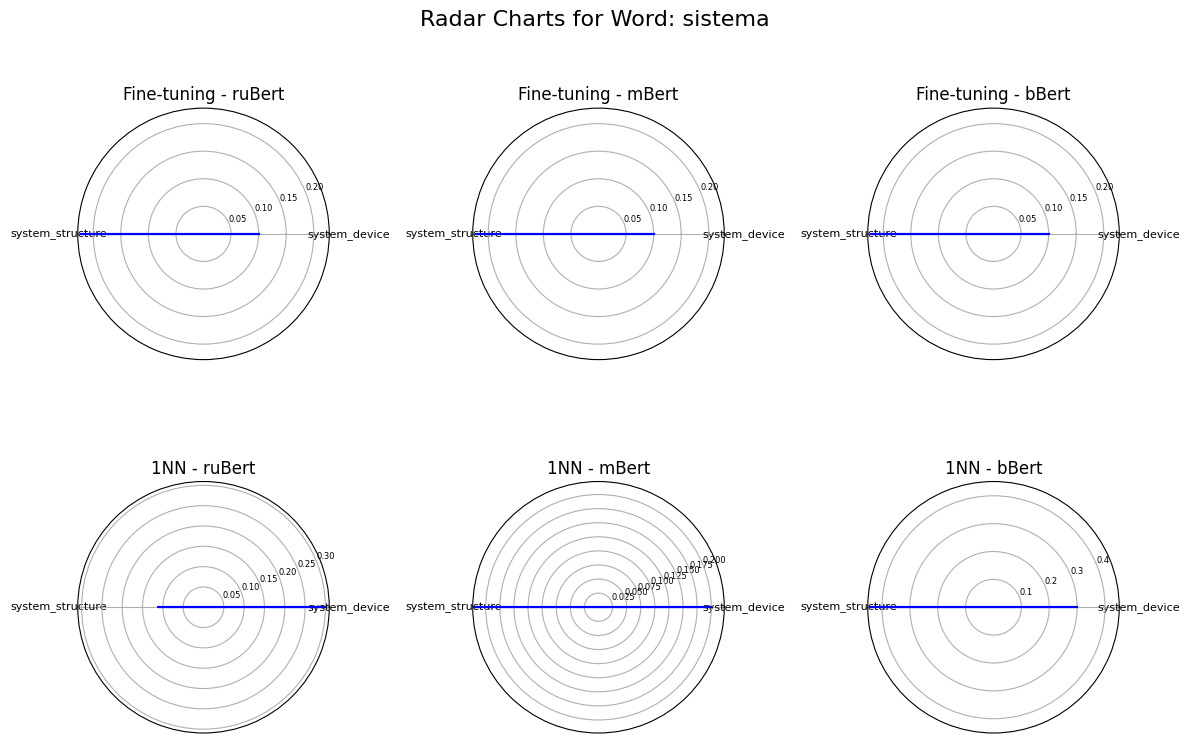

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

models = ['ruBert', 'mBert', 'bBert']
strategies = ['Fine-tuning', '1NN']
def word2radar_chart(word):
    fig, axes = plt.subplots(2, len(models), figsize=(12, 8), subplot_kw=dict(polar=True))
    fig.suptitle(f"Radar Charts for Word: {word}", fontsize=16)
    for ax_row, (df, name) in zip(axes, zip([df_ft, df_1nn], strategies)):
        for i, (ax, model) in enumerate(zip(ax_row, models)):
            word_rows = df[df['word'] == word]
            bias_values = [bias.tolist() for bias in word_rows['sense_biases']]
            categories = [v for k,v in translated_classes[word].items()]
            num_vars = len(categories)
            angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
            values = bias_values[i]
            #y = np.abs(np.sin(x))

            # Repeat the first value to close the circle
            values += values[:1]
            angles += angles[:1]
            # Checking the equal lengths
            if len(values) != len(angles):
              print('values:', values)
              print('angles:', angles)
            assert len(values) == len(angles)
            # Create a radar chart
            ax.plot(angles, values, color='blue')
            #ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
            #ax.fill_between(angles, 5, values, alpha=0.25, label=model)
            ax.fill(angles, values, color='skyblue', alpha=0.9)

            # Set the labels for each axis
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(categories, fontsize=8)
            # Decrease font size for grid labels
            ax.tick_params(axis='y', labelsize=6)
            # Set subplot title
            ax.set_title(f"{name} - {model}")

    plt.tight_layout()
    plt.show()


word = 'sistema'  # <----------------------------- for this word 6 plots for each system are displayed
word2radar_chart(word)


# Chart radar for all words from dataset


*   scale is **not** normalised
*   not really illustrative for 2-sensed samples



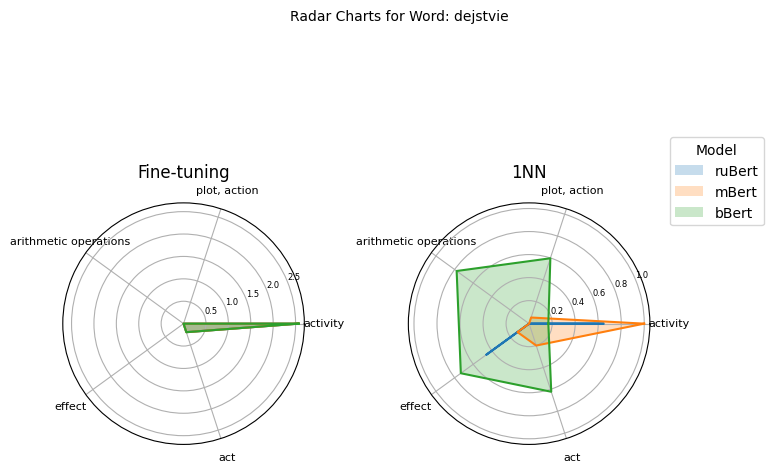

Dataset distribution:
                   Sense  Frequency
0               activity      0.439
1                 effect      0.331
2           plot, action      0.101
3  arithmetic operations      0.065
4                    act      0.065


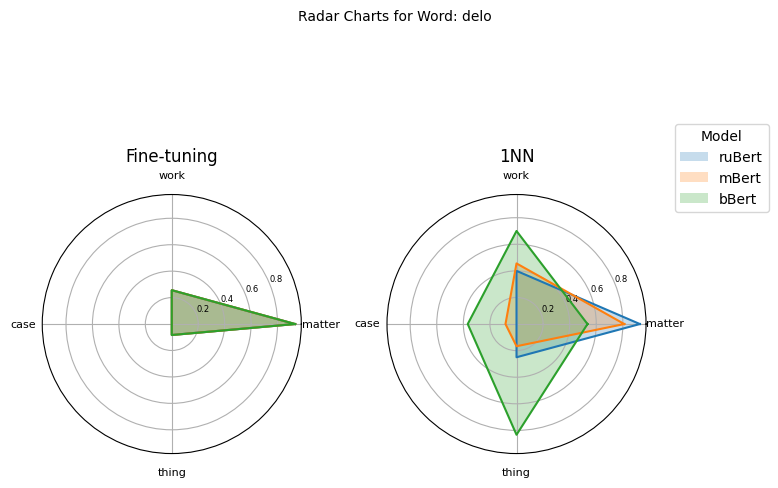

Dataset distribution:
    Sense  Frequency
0    case      0.347
1  matter      0.341
2    work      0.225
3   thing      0.087


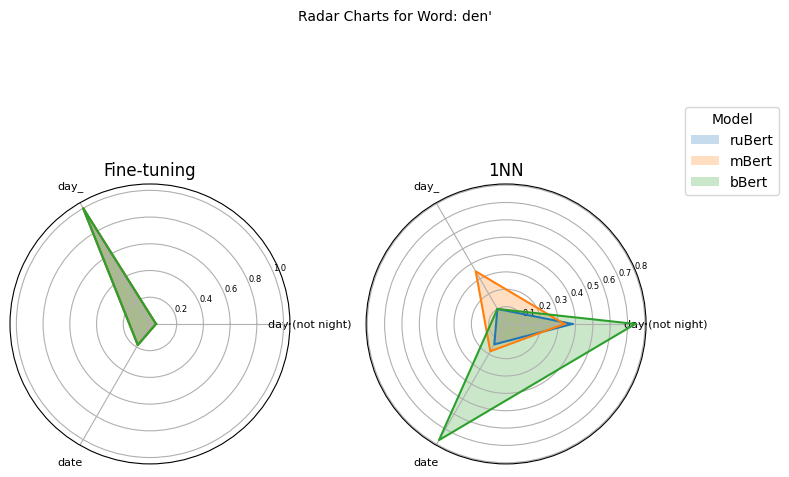

Dataset distribution:
             Sense  Frequency
0             day_      0.520
1             date      0.388
2  day (not night)      0.092


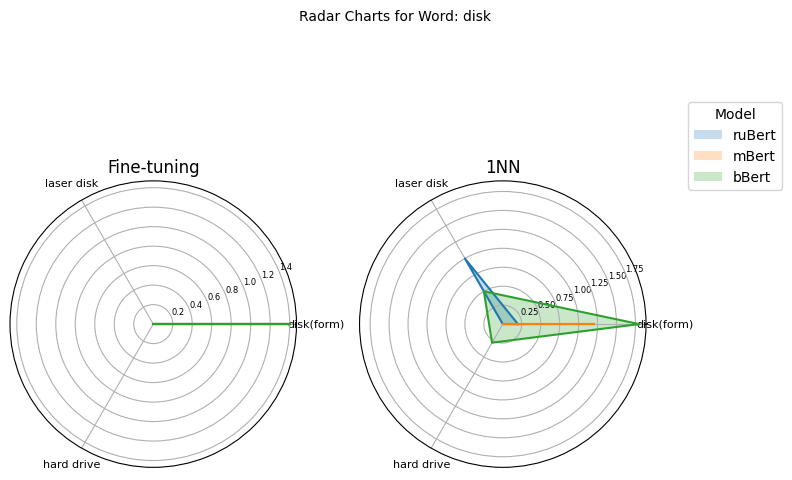

Dataset distribution:
        Sense  Frequency
0  disk(form)      0.639
1  laser disk      0.279
2  hard drive      0.082


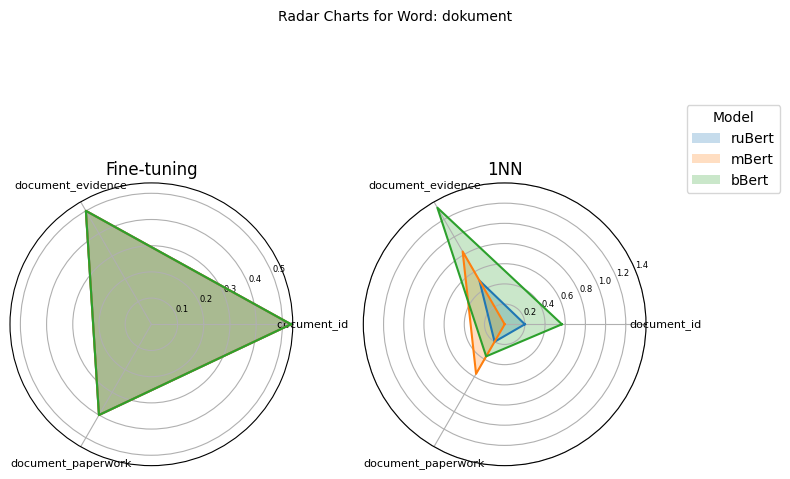

Dataset distribution:
                Sense  Frequency
0  document_paperwork      0.390
1   document_evidence      0.373
2         document_id      0.237


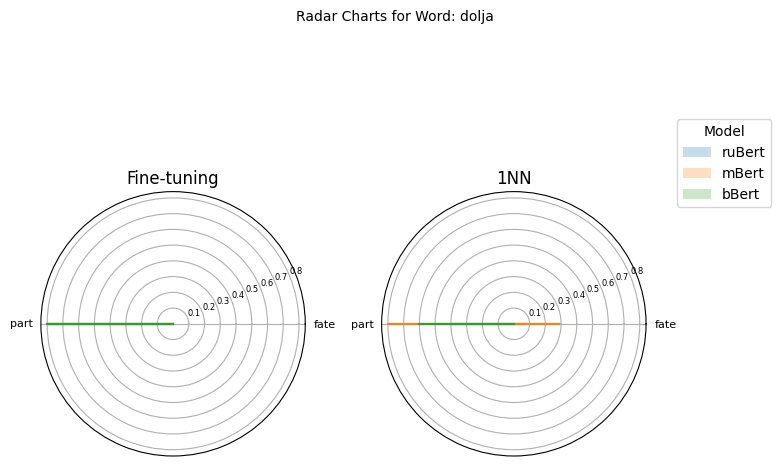

Dataset distribution:
  Sense  Frequency
0  part       0.75
1  fate       0.25


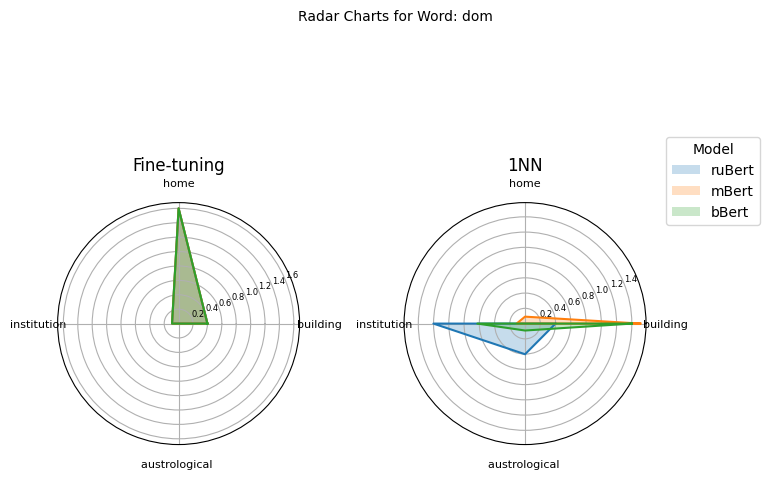

Dataset distribution:
            Sense  Frequency
0        building      0.440
1            home      0.345
2     institution      0.179
3  austrological       0.036


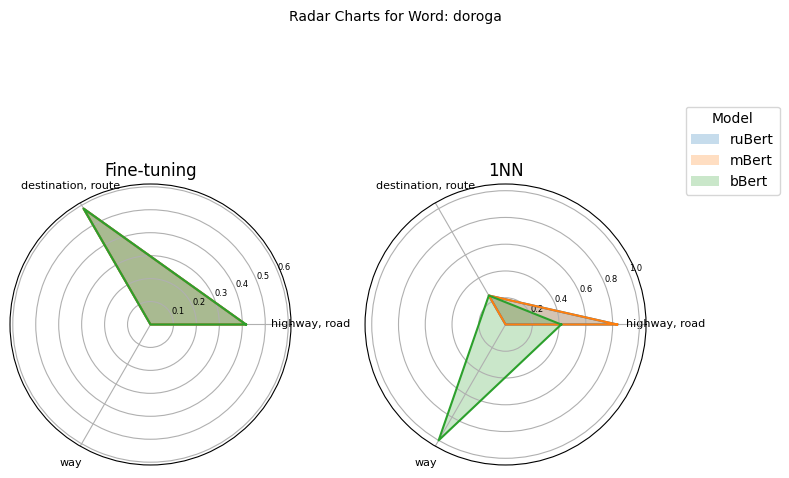

Dataset distribution:
                Sense  Frequency
0  destination, route      0.492
1       highway, road      0.302
2                 way      0.206


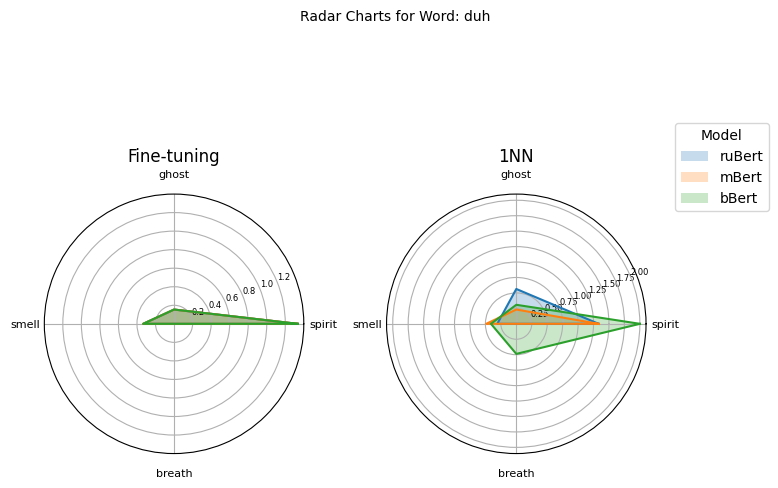

Dataset distribution:
    Sense  Frequency
0  spirit      0.559
1   ghost      0.265
2   smell      0.132
3  breath      0.044


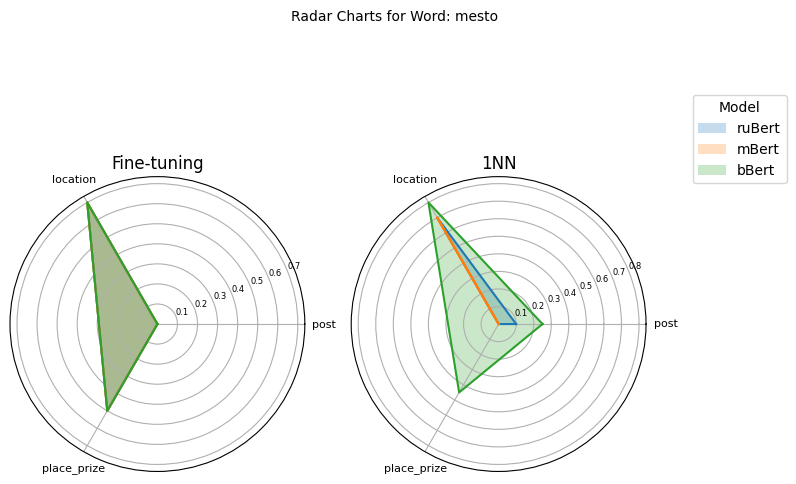

Dataset distribution:
         Sense  Frequency
0     location      0.607
1  place_prize      0.318
2         post      0.075


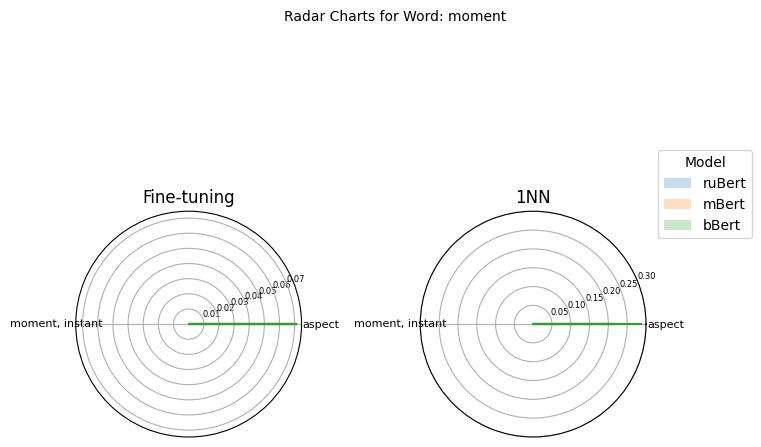

Dataset distribution:
             Sense  Frequency
0  moment, instant      0.882
1           aspect      0.118


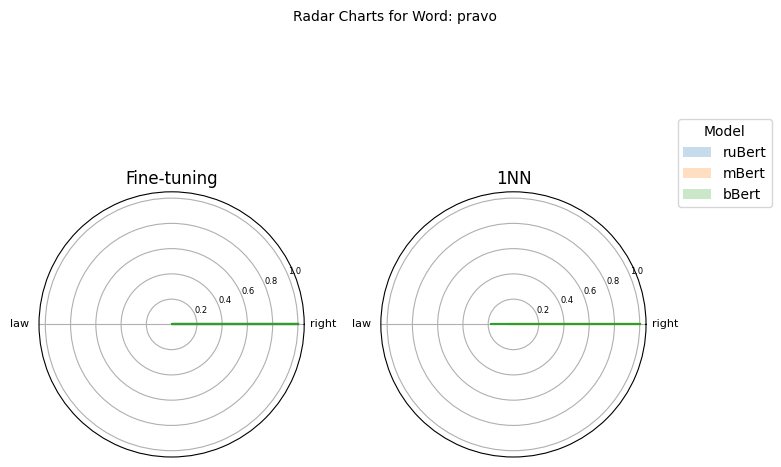

Dataset distribution:
   Sense  Frequency
0  right      0.957
1    law      0.043


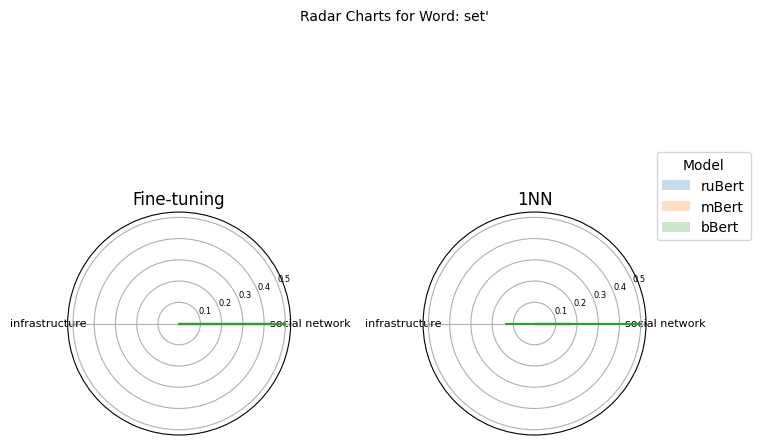

Dataset distribution:
            Sense  Frequency
0  social network       0.62
1  infrastructure       0.38


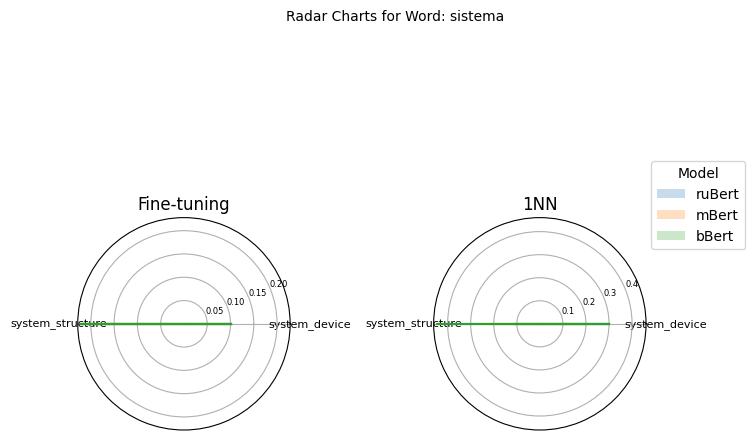

Dataset distribution:
              Sense  Frequency
0  system_structure      0.565
1     system_device      0.435


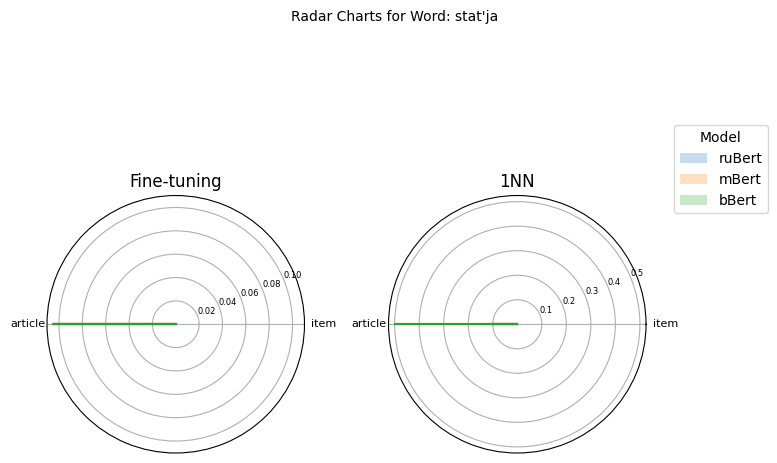

Dataset distribution:
     Sense  Frequency
0     item      0.724
1  article      0.276


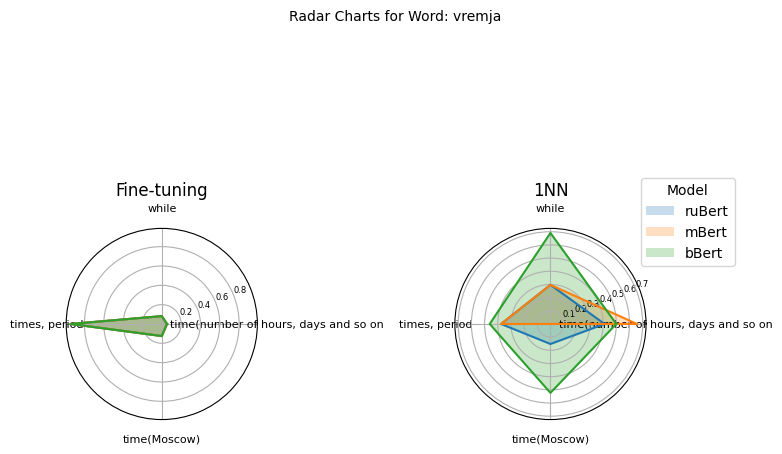

Dataset distribution:
                                  Sense  Frequency
0                         times, period      0.512
1  time(number of hours, days and so on      0.209
2                                 while      0.163
3                          time(Moscow)      0.116


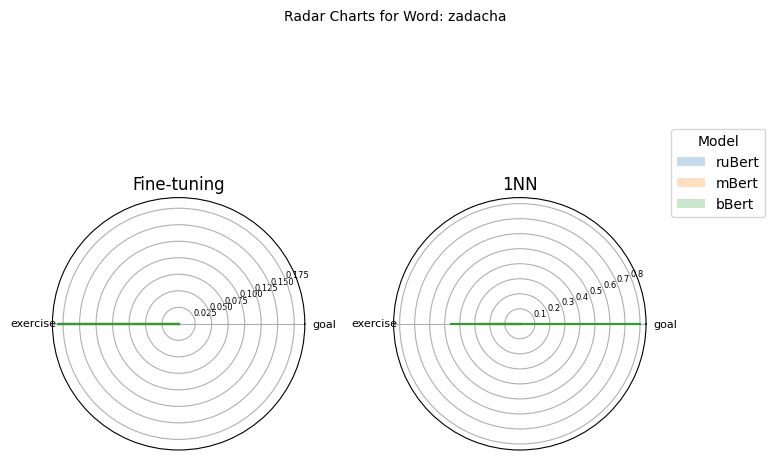

Dataset distribution:
      Sense  Frequency
0      goal      0.648
1  exercise      0.352


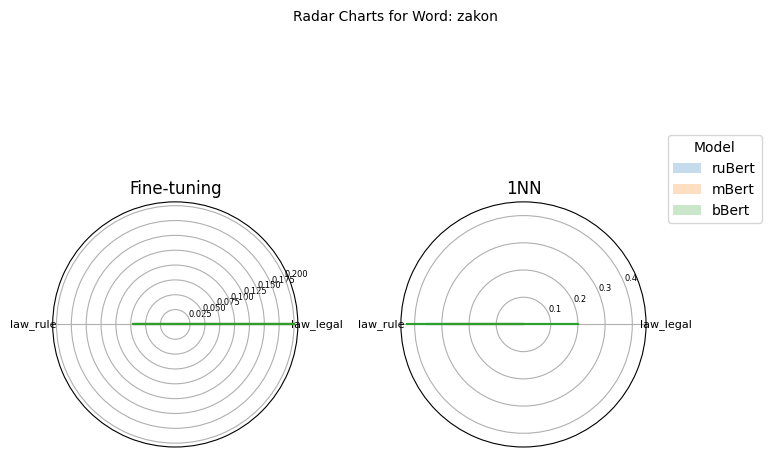

Dataset distribution:
       Sense  Frequency
0  law_legal      0.853
1   law_rule      0.147


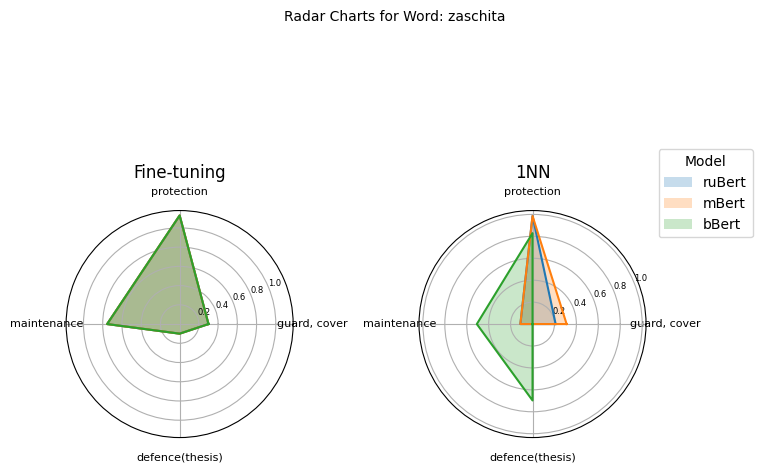

Dataset distribution:
             Sense  Frequency
0      maintenance      0.409
1       protection      0.312
2     guard, cover      0.215
3  defence(thesis)      0.065


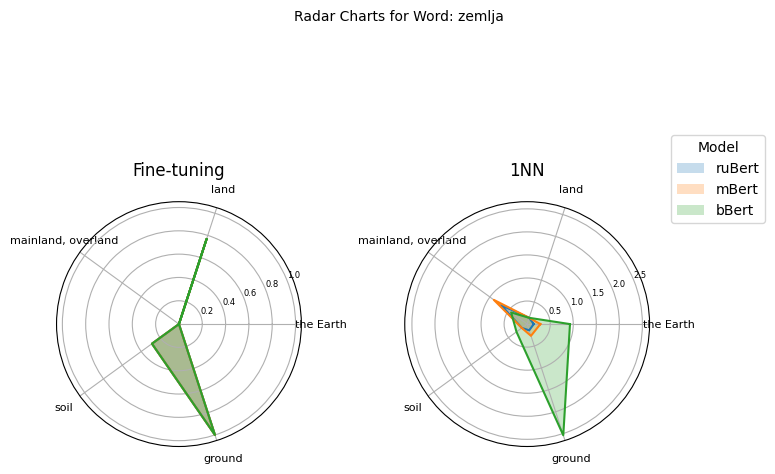

Dataset distribution:
                Sense  Frequency
0           the Earth      0.299
1                land      0.299
2              ground      0.195
3                soil      0.115
4  mainland, overland      0.092


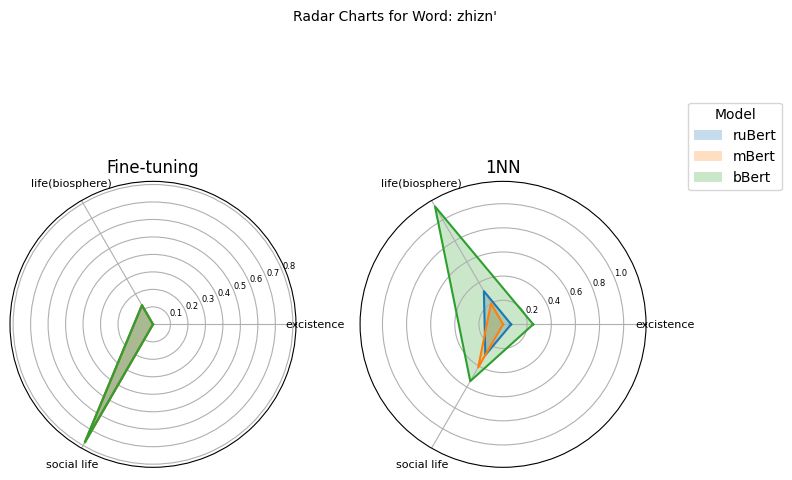

Dataset distribution:
             Sense  Frequency
0      social life      0.487
1       excistence      0.420
2  life(biosphere)      0.092


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import ast

models = ['ruBert', 'mBert', 'bBert']
strategies = ['Fine-tuning', '1NN']

def word2radar_chart(word, df_ft, df_1nn):
    fig, axes = plt.subplots(1, 2, figsize=(8, 6), subplot_kw=dict(polar=True))
    fig.suptitle(f"Radar Charts for Word: {word}", fontsize=10)

    # Plot for Fine-tuning
    ax_ft = axes[0]
    biases_ft = df_ft[df_ft['word'] == word]['sense_biases'].values
    bias_values_ft = [bias.tolist() for bias in biases_ft]


    for values_ft, model in zip(bias_values_ft, models):
        categories_ft = [v for k,v in translated_classes[word].items()]
        num_vars_ft = len(categories_ft)
        angles_ft = np.linspace(0, 2 * np.pi, num_vars_ft, endpoint=False).tolist()
        values_ft += values_ft[:1]
        angles_ft += angles_ft[:1]
        ax_ft.plot(angles_ft, values_ft)
        ax_ft.fill(angles_ft, values_ft, label=model, alpha=0.25)

    ax_ft.set_xticks(angles_ft[:-1])
    ax_ft.set_xticklabels(categories_ft, fontsize=8)
    ax_ft.tick_params(axis='y', labelsize=6)
    ax_ft.set_title(f"Fine-tuning")
    #ax_ft.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5), title='Model')

    # Plot for 1NN
    ax_1nn = axes[1]
    biases_1nn = df_1nn[df_1nn['word'] == word]['sense_biases'].values
    bias_values_1nn = [bias.tolist() for bias in biases_1nn]

    for values_1nn, model in zip(bias_values_1nn, models):
        categories_1nn = [v for k,v in translated_classes[word].items()]
        num_vars_1nn = len(categories_1nn)
        angles_1nn = np.linspace(0, 2 * np.pi, num_vars_1nn, endpoint=False).tolist()

        values_1nn += values_1nn[:1]
        angles_1nn += angles_1nn[:1]
        ax_1nn.plot(angles_1nn, values_1nn)
        ax_1nn.fill(angles_1nn, values_1nn, label=model, alpha=0.25)

    ax_1nn.set_xticks(angles_1nn[:-1])
    ax_1nn.set_xticklabels(categories_1nn, fontsize=8)
    ax_1nn.tick_params(axis='y', labelsize=6)
    ax_1nn.set_title(f"1NN")
    ax_1nn.legend(loc='upper right', bbox_to_anchor=(1.5, 1.3), title='Model')



    plt.tight_layout(rect=[0, 0, 1, 0.96])
    #plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.3), title='Model')
    plt.show()


# Example usage
for word, (word, sd) in zip(df_ft['word'][:21], senses_distrib.items()):
    word2radar_chart(word, df_ft, df_1nn)
    print('Dataset distribution:')
    print(pd.DataFrame(list(sd.items()), columns=['Sense', 'Frequency']))
    #word2radar_chart(word, df_ft, df_1nn)


# Stellar Chart for all words in dataset



*   scale is **normalized** (uniformly from 0 to 10). The actual value is multiplied by 10 for the convenience
*   a bit confusing for multisensed words

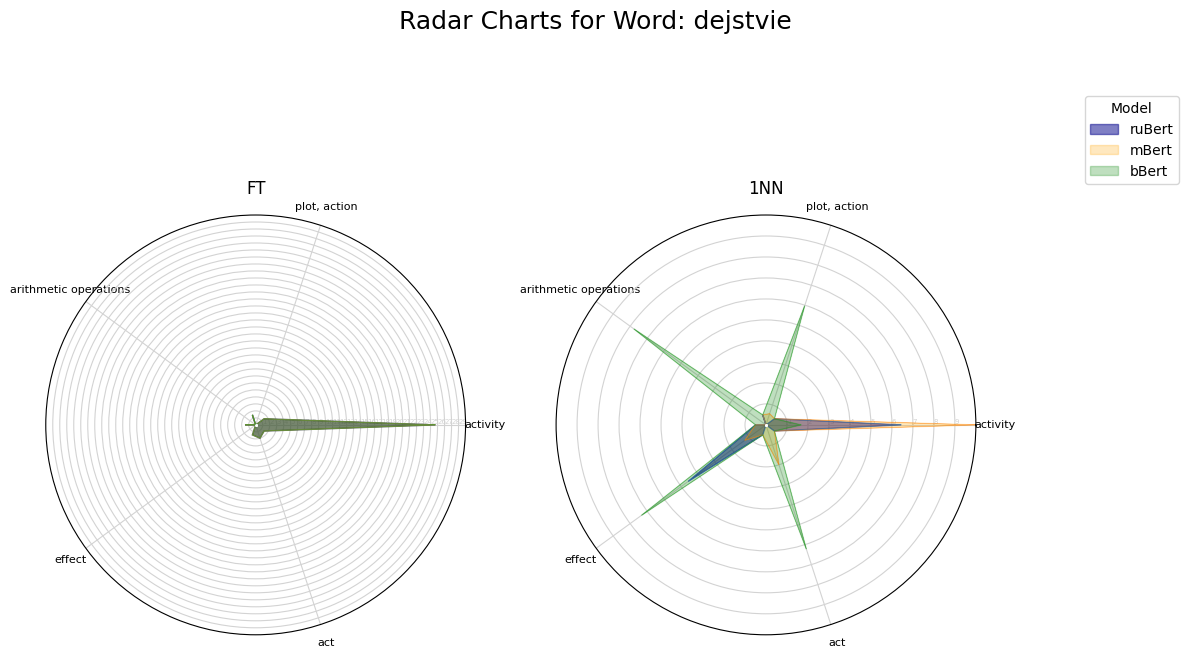

Dataset distribution:
                   Sense  Frequency
0               activity      0.439
1                 effect      0.331
2           plot, action      0.101
3  arithmetic operations      0.065
4                    act      0.065


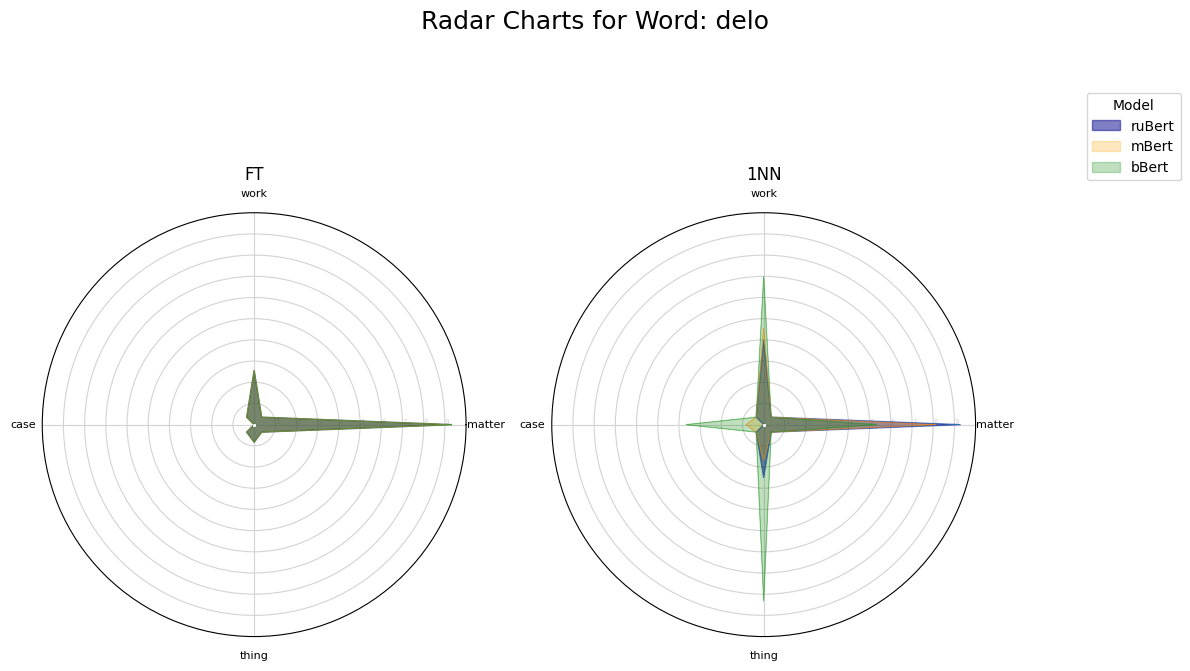

Dataset distribution:
    Sense  Frequency
0    case      0.347
1  matter      0.341
2    work      0.225
3   thing      0.087


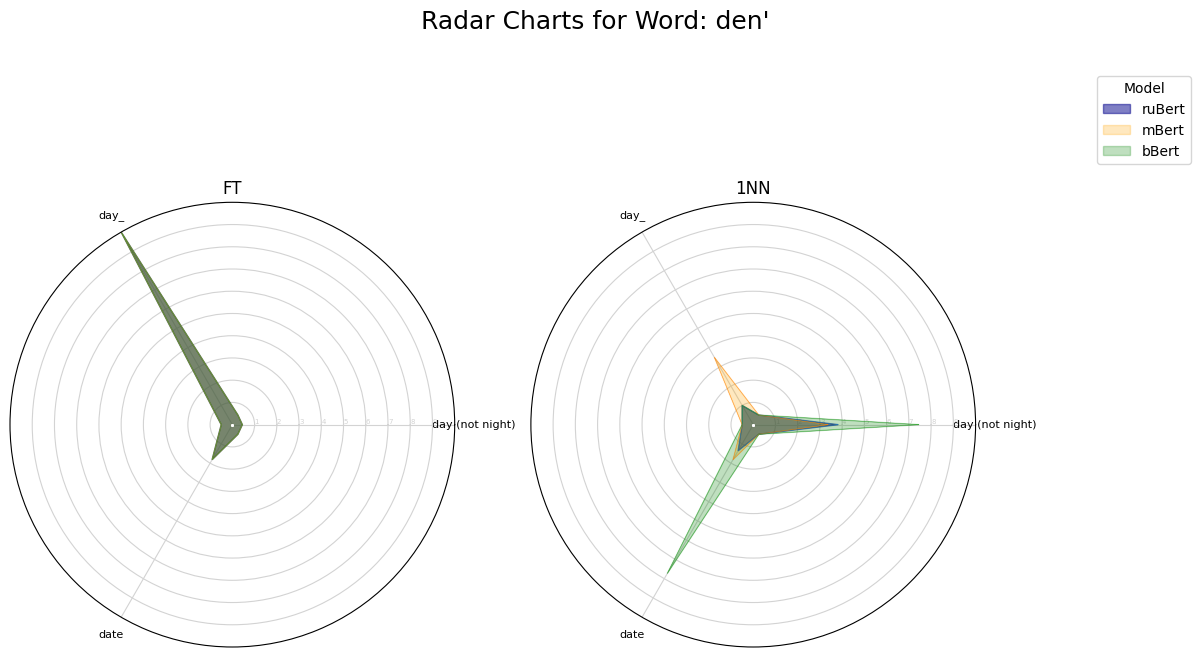

Dataset distribution:
             Sense  Frequency
0             day_      0.520
1             date      0.388
2  day (not night)      0.092


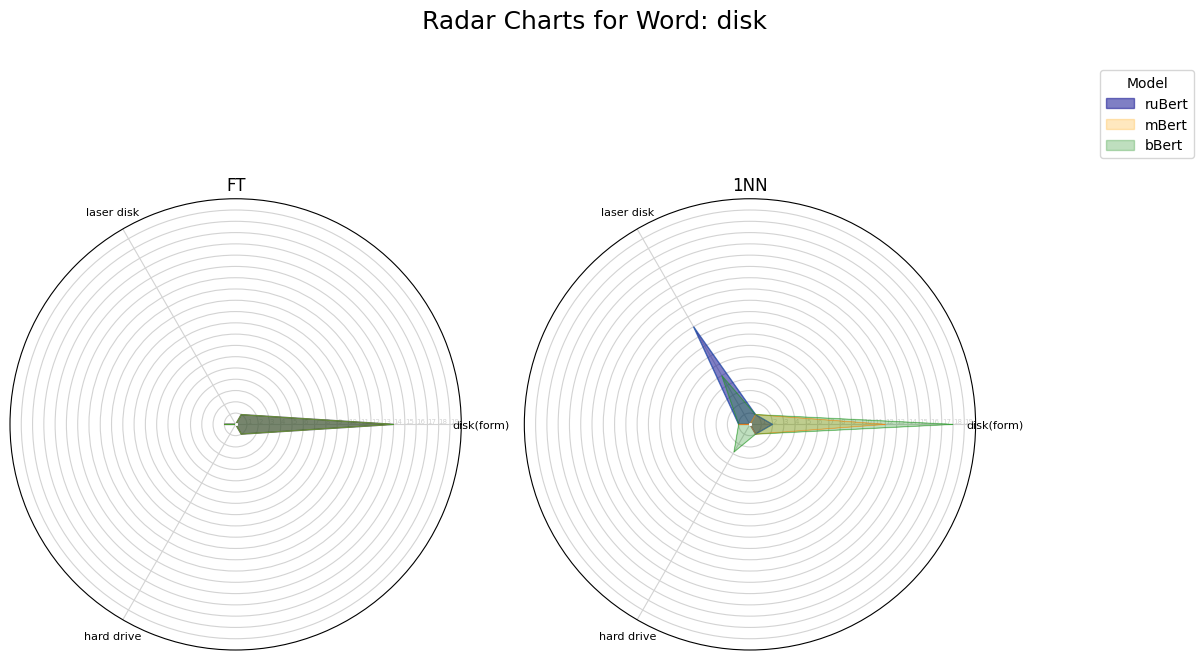

Dataset distribution:
        Sense  Frequency
0  disk(form)      0.639
1  laser disk      0.279
2  hard drive      0.082


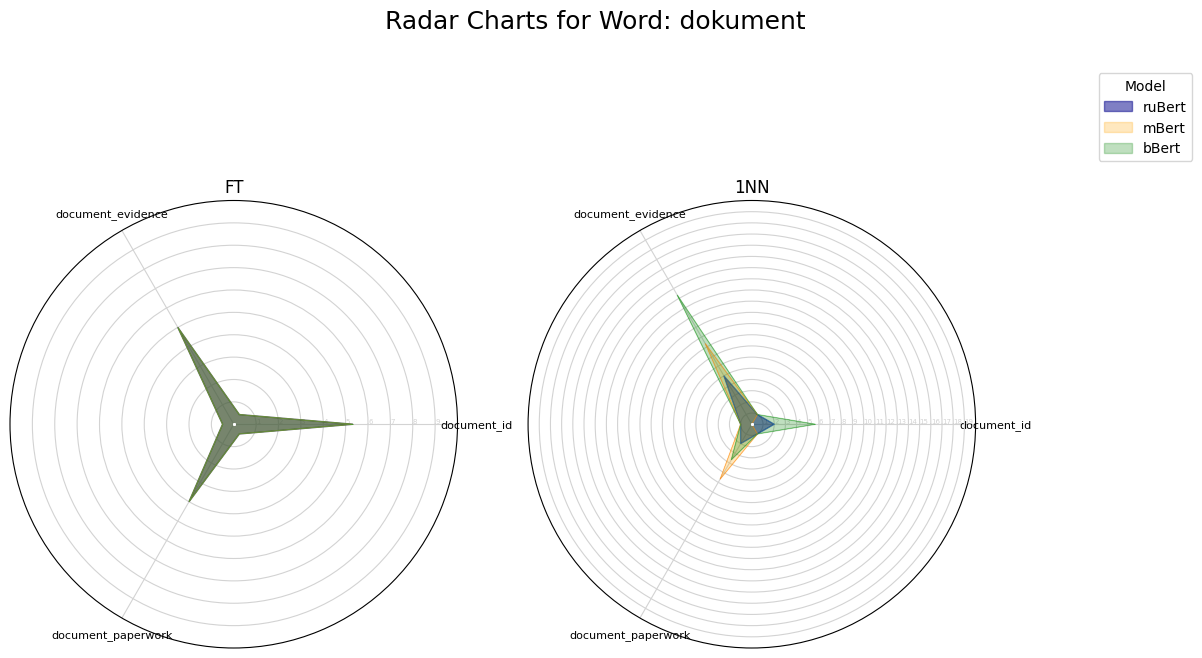

Dataset distribution:
                Sense  Frequency
0  document_paperwork      0.390
1   document_evidence      0.373
2         document_id      0.237


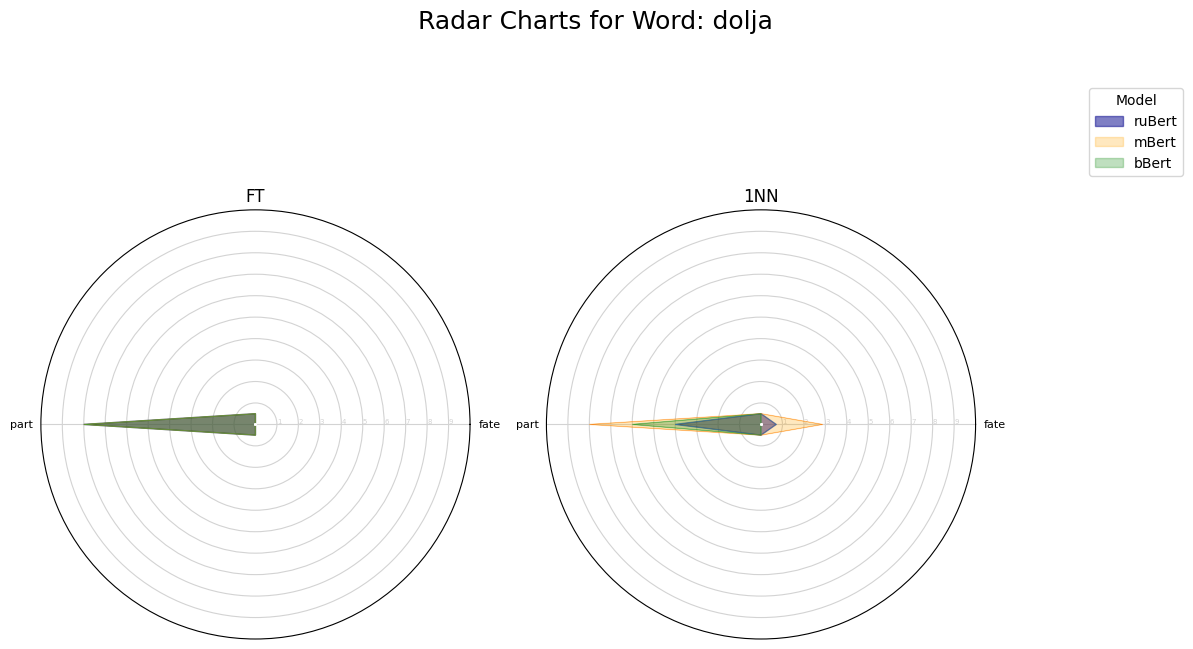

Dataset distribution:
  Sense  Frequency
0  part       0.75
1  fate       0.25


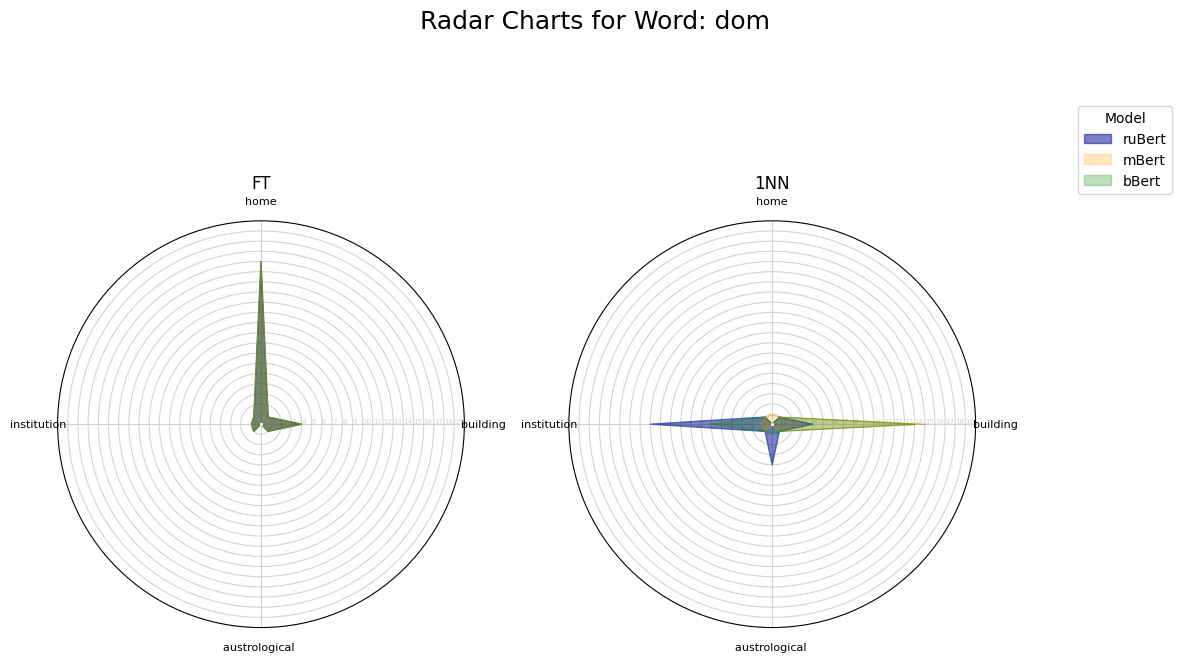

Dataset distribution:
            Sense  Frequency
0        building      0.440
1            home      0.345
2     institution      0.179
3  austrological       0.036


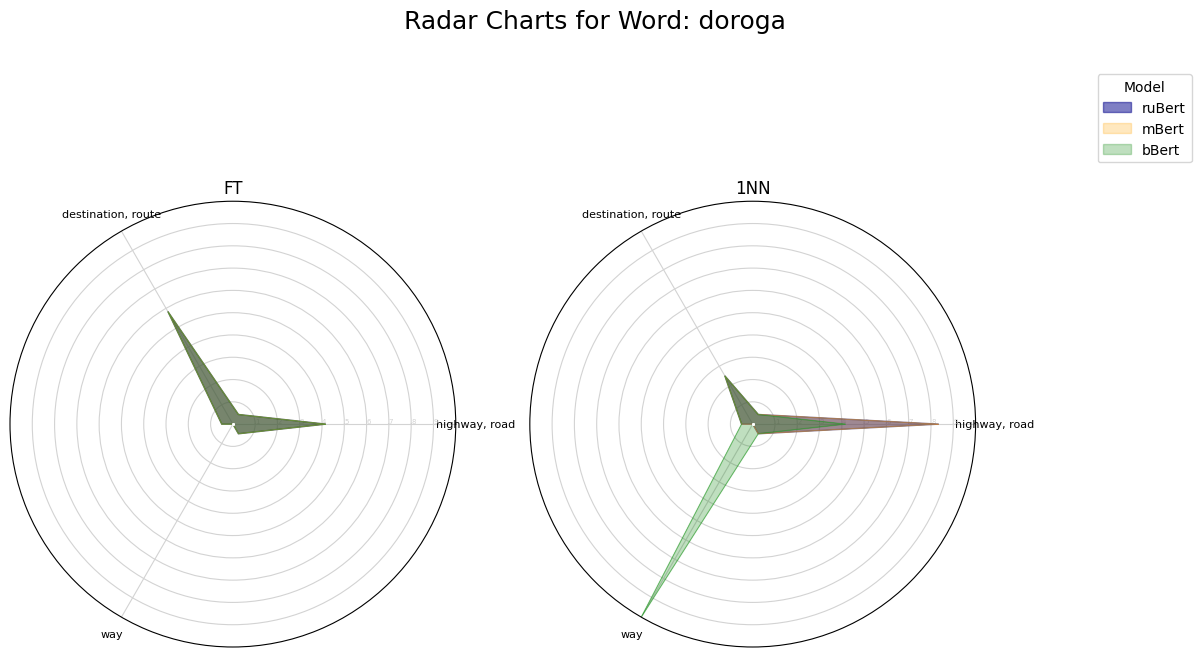

Dataset distribution:
                Sense  Frequency
0  destination, route      0.492
1       highway, road      0.302
2                 way      0.206


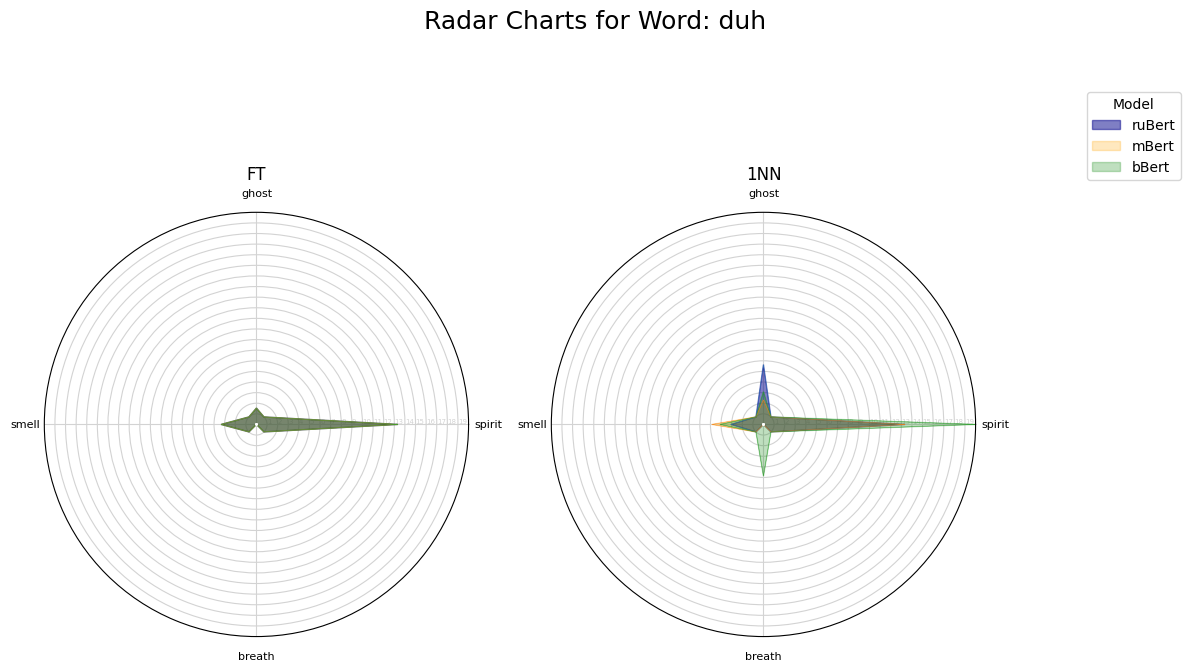

Dataset distribution:
    Sense  Frequency
0  spirit      0.559
1   ghost      0.265
2   smell      0.132
3  breath      0.044


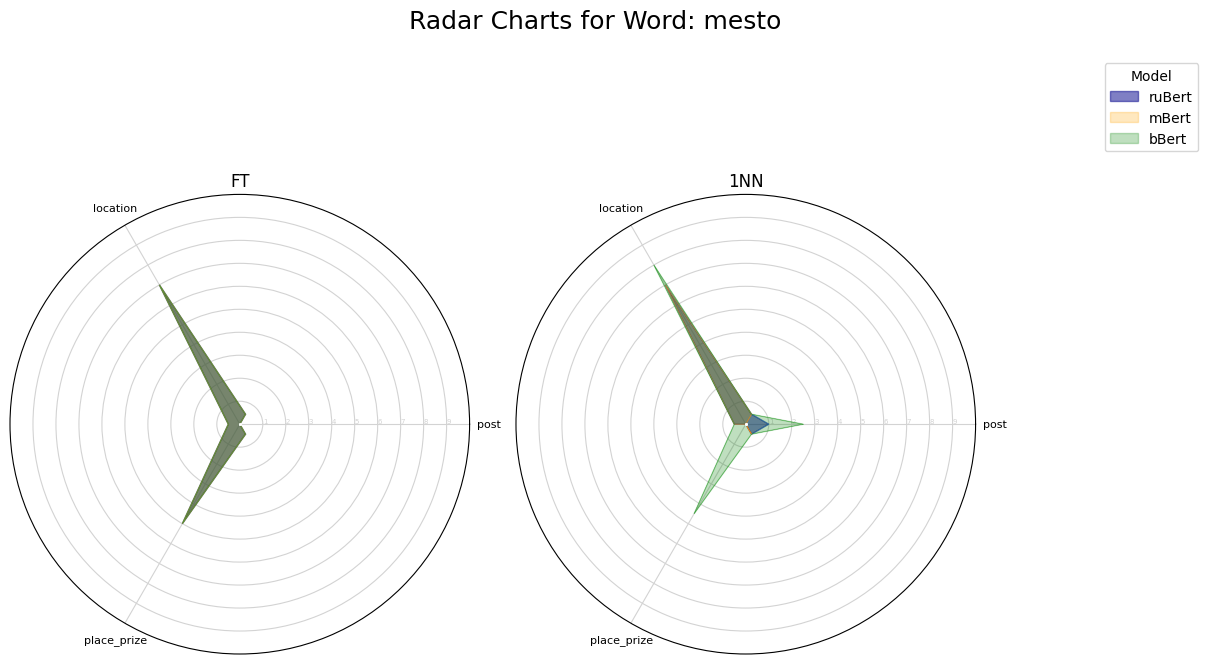

Dataset distribution:
         Sense  Frequency
0     location      0.607
1  place_prize      0.318
2         post      0.075


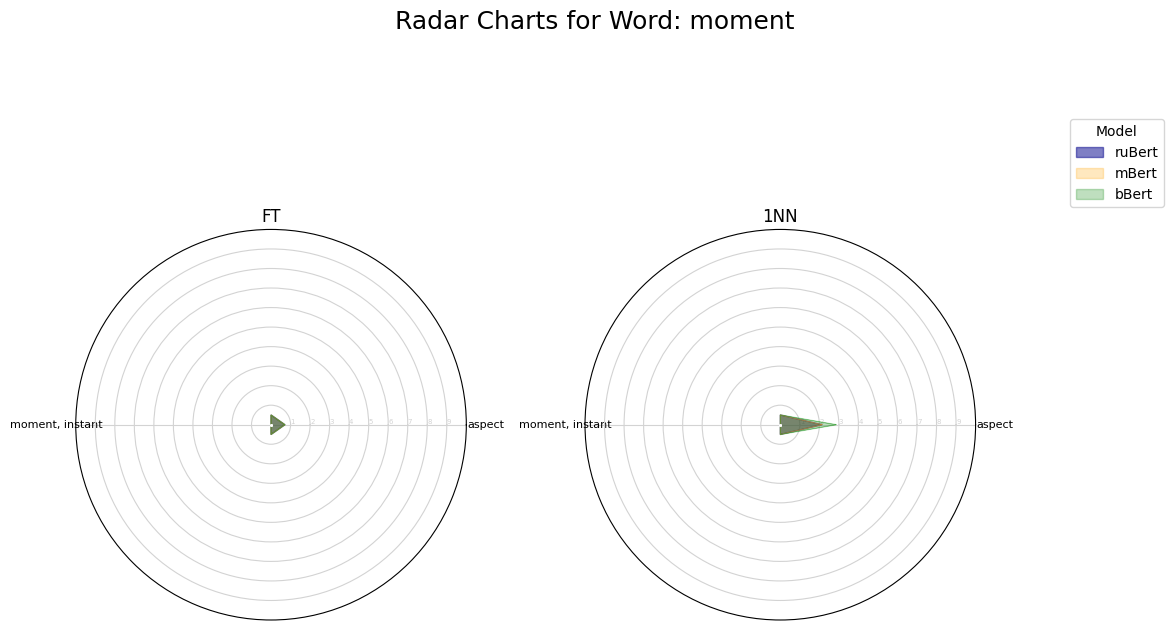

Dataset distribution:
             Sense  Frequency
0  moment, instant      0.882
1           aspect      0.118


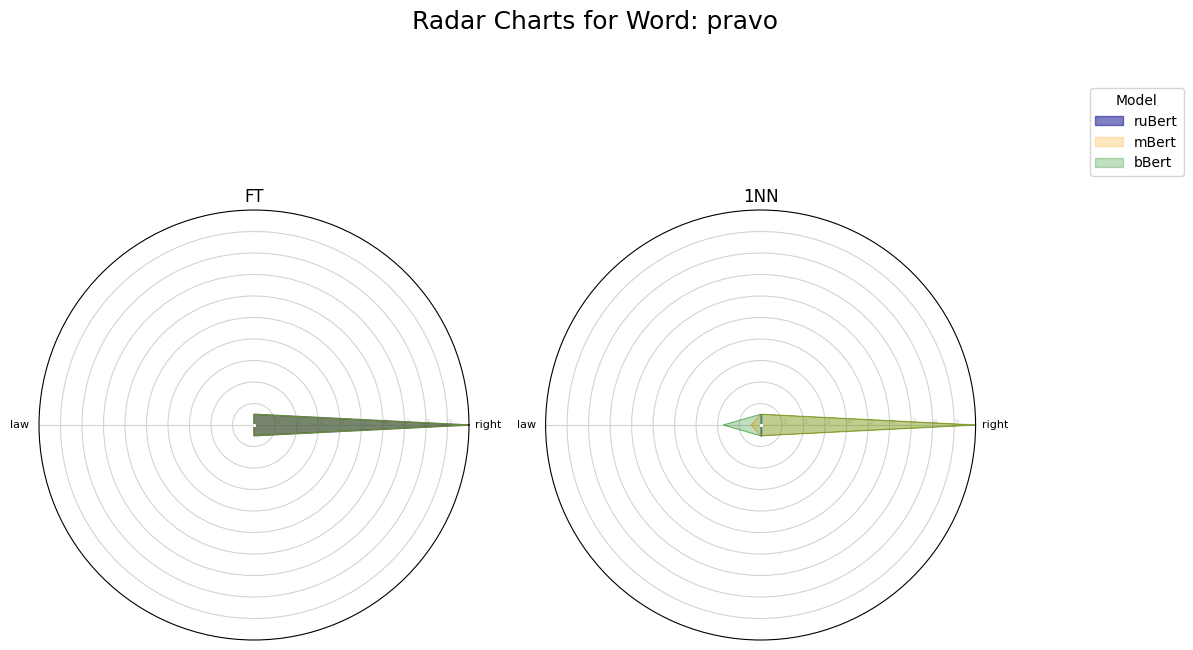

Dataset distribution:
   Sense  Frequency
0  right      0.957
1    law      0.043


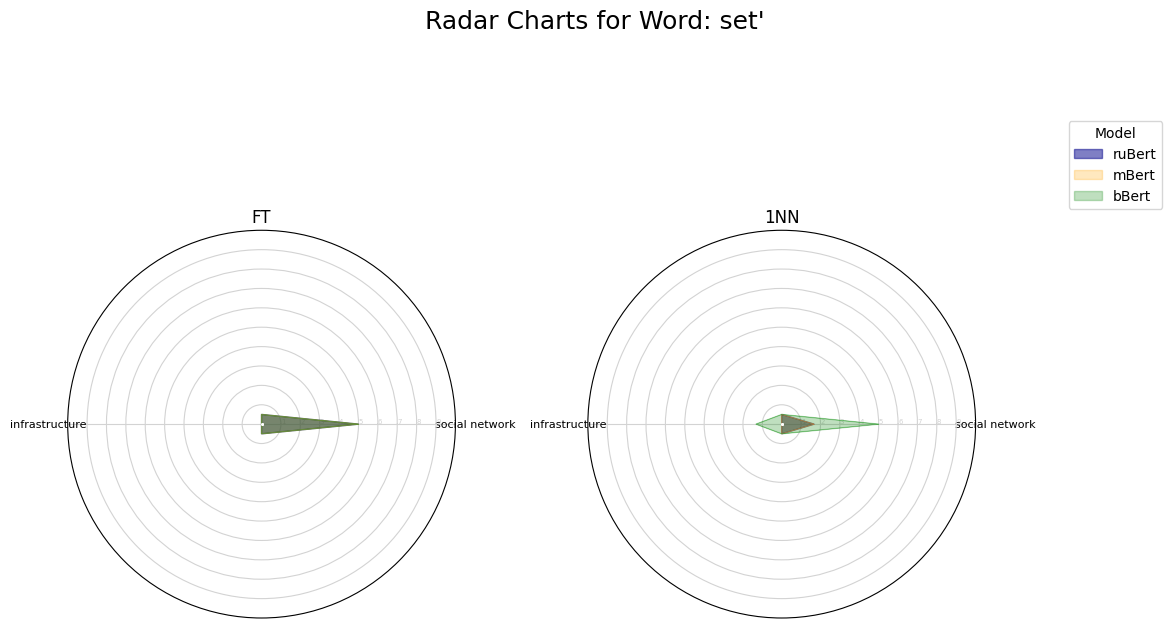

Dataset distribution:
            Sense  Frequency
0  social network       0.62
1  infrastructure       0.38


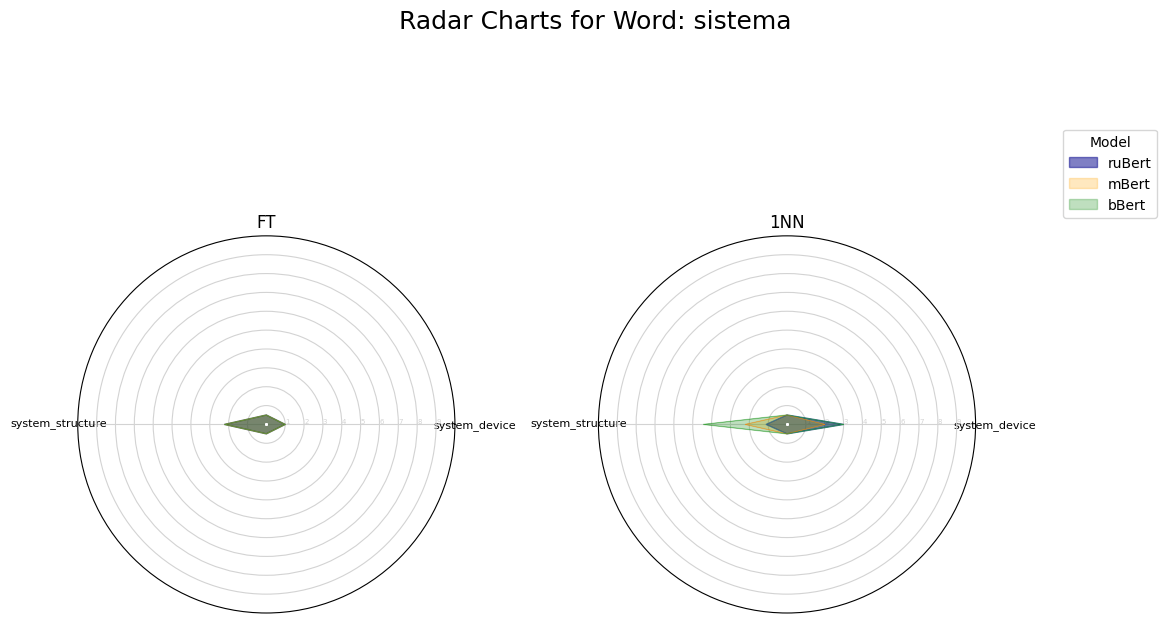

Dataset distribution:
              Sense  Frequency
0  system_structure      0.565
1     system_device      0.435


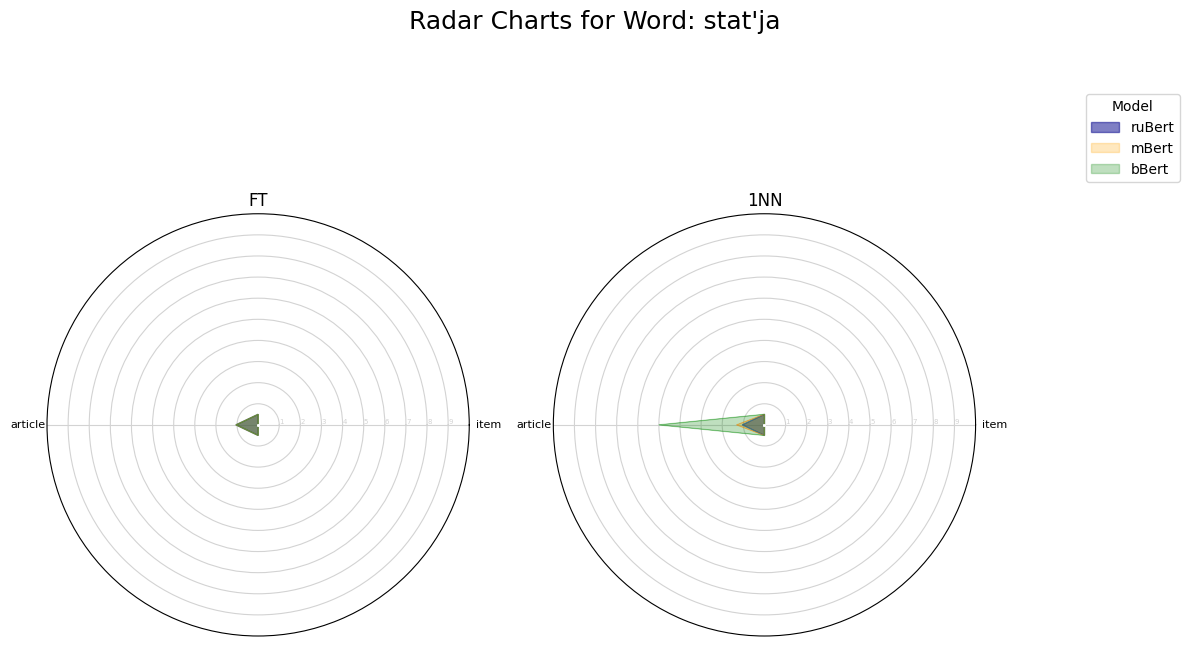

Dataset distribution:
     Sense  Frequency
0     item      0.724
1  article      0.276


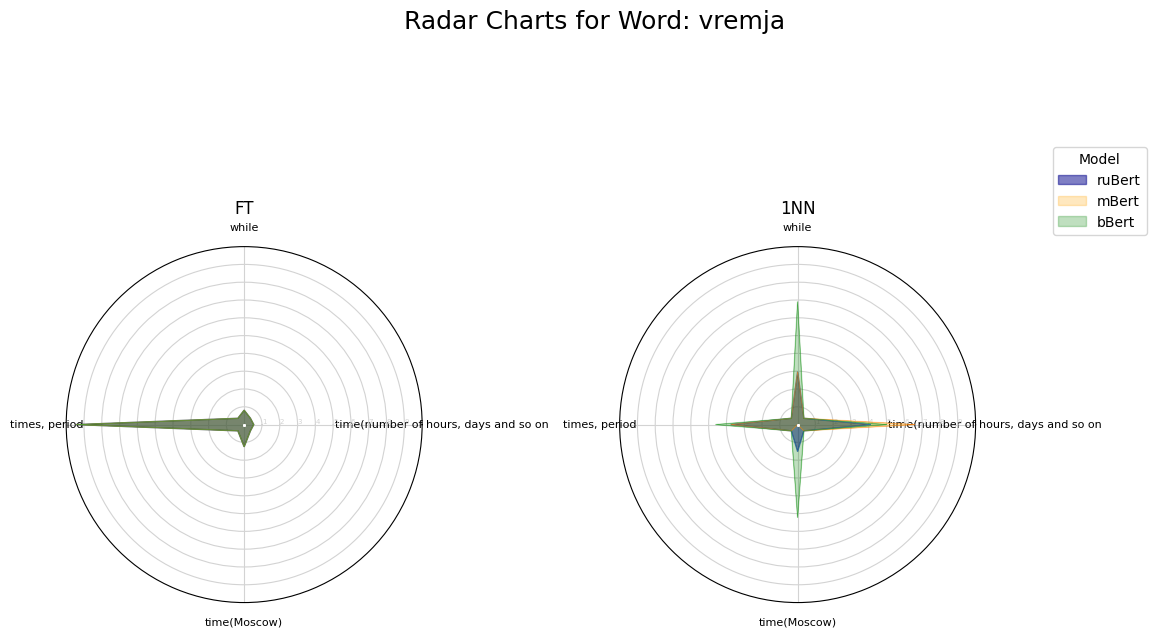

Dataset distribution:
                                  Sense  Frequency
0                         times, period      0.512
1  time(number of hours, days and so on      0.209
2                                 while      0.163
3                          time(Moscow)      0.116


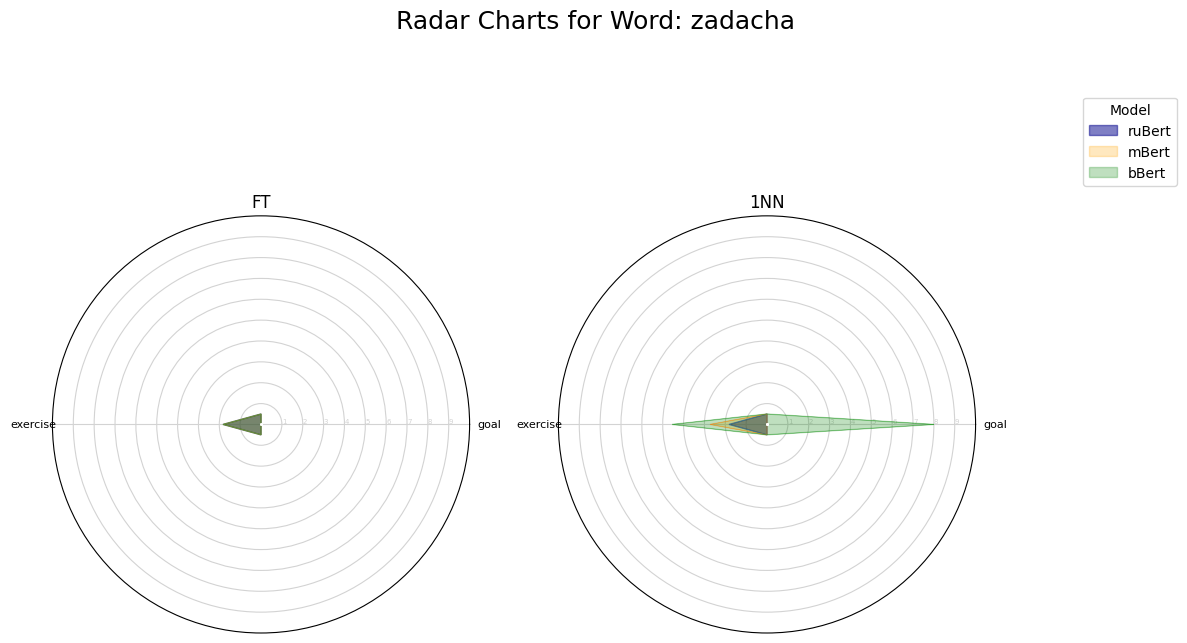

Dataset distribution:
      Sense  Frequency
0      goal      0.648
1  exercise      0.352


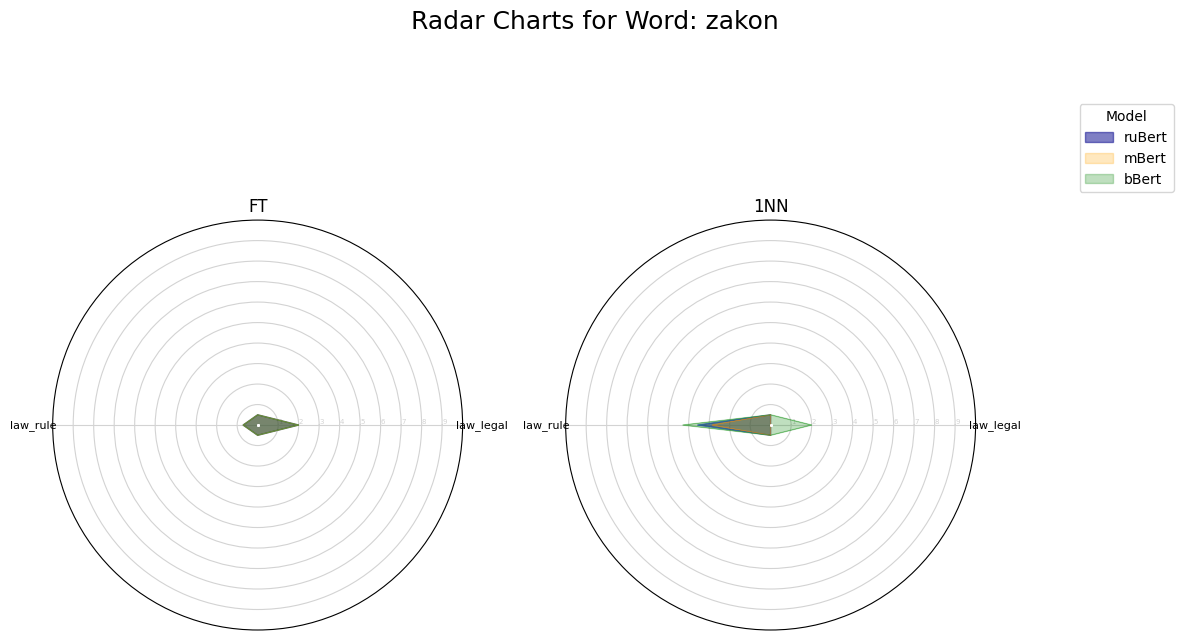

Dataset distribution:
       Sense  Frequency
0  law_legal      0.853
1   law_rule      0.147


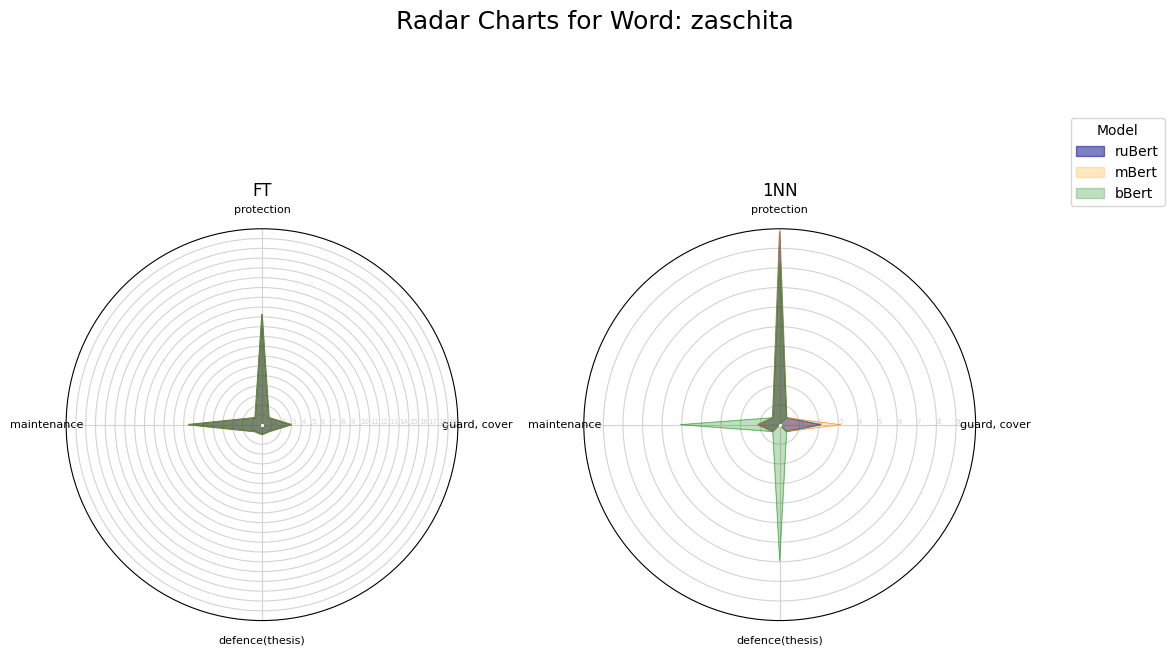

Dataset distribution:
             Sense  Frequency
0      maintenance      0.409
1       protection      0.312
2     guard, cover      0.215
3  defence(thesis)      0.065


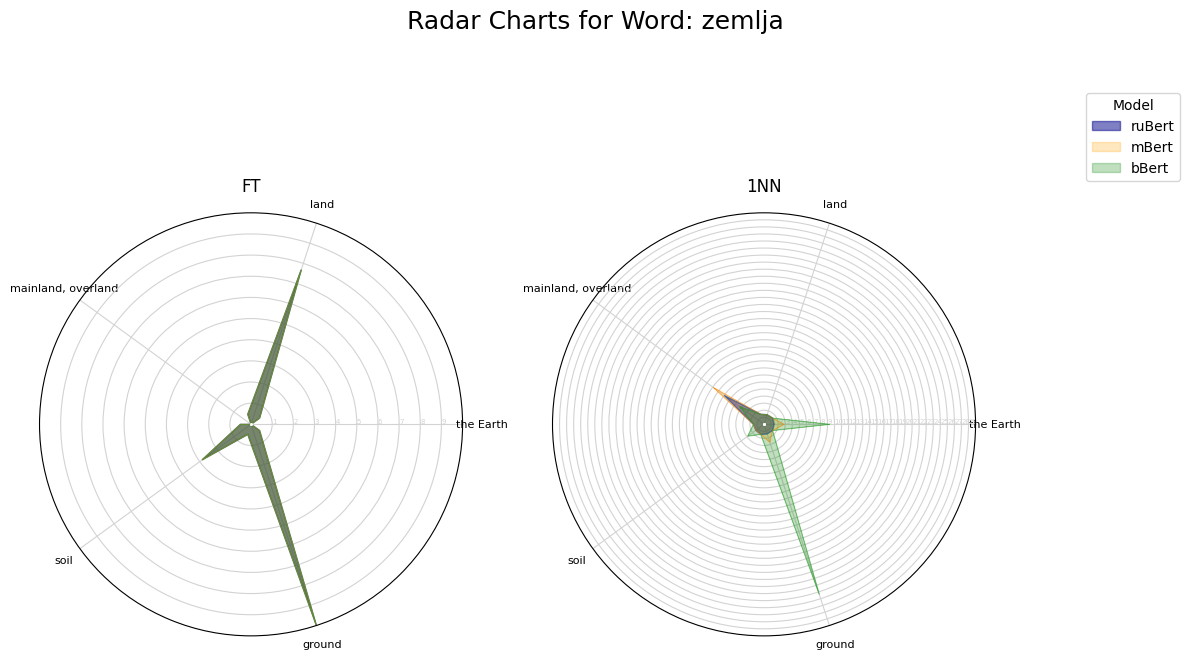

Dataset distribution:
                Sense  Frequency
0           the Earth      0.299
1                land      0.299
2              ground      0.195
3                soil      0.115
4  mainland, overland      0.092


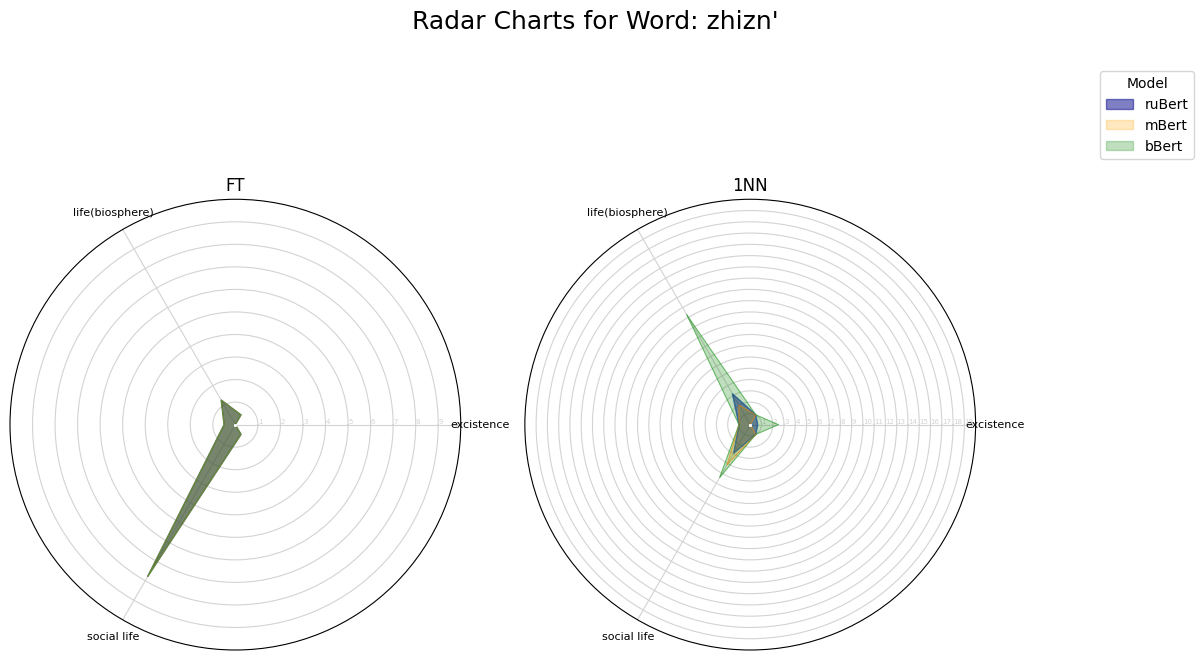

Dataset distribution:
             Sense  Frequency
0      social life      0.487
1       excistence      0.420
2  life(biosphere)      0.092


In [ ]:
#https://matplotlib.org/matplotblog/posts/stellar-chart-alternative-radar-chart/

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, pi
from itertools import chain, zip_longest
import matplotlib.colors as mcolors
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

pastel_red = mcolors.to_rgba('orange', alpha=0.25)
pastel_green = mcolors.to_rgba('green', alpha=0.25)
pastel_blue = mcolors.to_rgba('darkblue', alpha=0.5)

pastel_colors = [pastel_blue, pastel_red, pastel_green]
models = ['ruBert', 'mBert', 'bBert']

def round_up(value):
    return int(ceil(value / 10.0)) * 10

def even_odd_merge(even, odd, filter_none=True):
    if filter_none:
        return filter(None.__ne__, chain.from_iterable(zip_longest(even, odd)))
    return chain.from_iterable(zip_longest(even, odd))

def prepare_angles(N):
    angles = [n / N * 2 * pi for n in range(N)]
    angles += angles[:1]
    return angles

def prepare_data(word, df):
    word_rows = df[df['word'] == word]
    values = [list(map(lambda x: x * 10, bias.tolist())) + [bias.tolist()[0] * 10] for bias in word_rows['sense_biases']]
    labels = [v for k,v in translated_classes[word].items()]
    N = len(labels)
    ymax = max(max(v) for v in values)
    return labels, values, N, ymax

def prepare_stellar_aux_data(angles, ymax, N):
    angle_midpoint = pi / N
    stellar_angles = [angle + angle_midpoint for angle in angles[:-1]]
    stellar_values = [0.05 * ymax] * N
    return stellar_angles, stellar_values

def draw_peripherals(ax, labels, angles, ymax, outer_color, inner_color):
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color=outer_color, size=8)
    ax.set_yticks(range(1, ymax, 1))
    ax.set_yticklabels(range(1, ymax, 1), color=inner_color, size=5)
    ax.set_ylim(0, ymax)
    ax.set_rlabel_position(0)

    ax.set_axisbelow(True)
    ax.spines["polar"].set_color(outer_color)
    ax.xaxis.grid(True, color=inner_color, linestyle="-")
    ax.yaxis.grid(True, color=inner_color, linestyle="-")

def draw_stellar(ax, labels, values, angles, N, shape_colors, models):

    ymax = round_up(max(max(v) for v in values))
    stellar_angles, stellar_values = prepare_stellar_aux_data(angles, ymax, N)
    for vals, model, color in zip(values, models, shape_colors):
        all_angles = list(even_odd_merge(angles, stellar_angles))
        all_values = list(even_odd_merge(vals, stellar_values))

        if len(all_angles)!=len(all_values):
            print(all_angles)
            print(all_values)
        assert len(all_angles) == len(all_values)

        draw_peripherals(ax, labels, angles, ymax, 'black', "lightgrey")
        ax.plot(all_angles, all_values, linewidth=0.3, linestyle="solid", solid_joinstyle="round")
        ax.fill(all_angles, all_values, label=model, color=color)
        ax.plot(0, 0, marker="o", color="white", markersize=1)

def draw_radar_chart(word, data):
    fig, axs = plt.subplots(1, 2, figsize=(12, 8), subplot_kw=dict(polar=True))
    fig.suptitle(f"Radar Charts for Word: {word}", fontsize=18)

    # for FT:
    labels, values, N, ymax = prepare_data(word, data[0])
    shape_colors =  pastel_colors
    angles = prepare_angles(N)
    ax_ft = axs[0]
    draw_stellar(ax_ft, labels, values, angles, N, shape_colors, models)
    ax_ft.set_xticks(angles[:-1])
    ax_ft.set_xticklabels(labels, fontsize=8)
    ax_ft.set_title(f'FT')

    # for 1NN:
    labels, values, N, ymax = prepare_data(word, data[1])
    shape_colors = pastel_colors
    angles = prepare_angles(N)
    ax_1NN = axs[1]
    draw_stellar(ax_1NN, labels, values, angles, N, shape_colors, models)
    ax_1NN.set_xticks(angles[:-1])
    ax_1NN.set_xticklabels(labels, fontsize=8)
    ax_1NN.legend(loc='upper right', bbox_to_anchor=(1.5, 1.3), title='Model')
    ax_1NN.set_title(f'1NN')

    plt.tight_layout()
    plt.show()


for word, (word,sd) in zip(df_ft['word'][:21],senses_distrib.items()):
    draw_radar_chart(word, [df_ft, df_1nn])
    print('Dataset distribution:')
    print(pd.DataFrame(list(sd.items()), columns=['Sense', 'Frequency']))

FT models:


*  exhibit identical bias, regardless of the specific BERT model employed
*  14 out of 21 words are biased toward the least frequent sense in the dataset


1NN models:

*   demonstrate diverse biases depending on the BERT model
*   10 out from 21 words are biased toward the least frequent sense in the dataset by bBERT


